In [1]:
from __future__ import print_function
import numpy as np 
import pandas as pd 
import torch 
import torch.nn.functional as F
import matplotlib.pyplot as plt

import IPython.display as ipd
import seaborn as sns

import warnings
import os

import torch
from torch import nn, optim
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing

In [2]:
audio_features = pd.read_csv('/home/FRACTAL/shaheen.perveen/SER_new/preprocess_info/audio_features.csv')

In [3]:
emotion_dict = {'ang': 0,
                'hap': 1,
                'exc': 2,
                'sad': 3,
                'fru': 4,
                'fea': 5,
                'sur': 6,
                'neu': 7,
                'xxx': 8,
                'oth': 8,
                'dis': 8}

In [4]:
audio_features.label.value_counts()

8    2634
4    1870
7    1791
0    1146
2    1140
3    1107
1     691
6     115
5      47
Name: label, dtype: int64

In [5]:
audio_4emotions = audio_features[audio_features["label"].isin([0, 1, 3, 7])]

In [6]:
audio_4emotions.shape

(4735, 201)

In [7]:
def emotion(x):
    if x == 0:
        return "angry"
    elif x == 1:
        return "happy"
    elif x == 3:
        return "sadness"
    else:
        return 'neutral'

In [8]:
audio_4emotions["emotion"] = audio_4emotions["label"].apply(emotion)

In [9]:
def label_new(x):
    if x == 0:
        return 0
    elif x == 1:
        return 1
    elif x == 3:
        return 2
    else:
        return 3

In [10]:
audio_4emotions["label"] = audio_4emotions["label"].apply(label_new)

In [21]:
audio_4emotions["emotion"].value_counts()

neutral    1791
angry      1146
sadness    1107
happy       691
Name: emotion, dtype: int64

In [ ]:
audio_4emotions.head()

In [25]:
columns = list(audio_4emotions.columns)[2:-1]

flatness


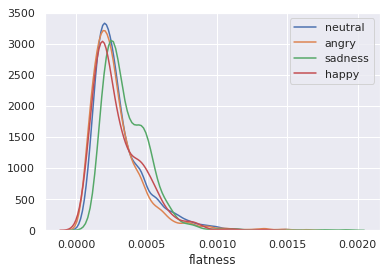

zerocr


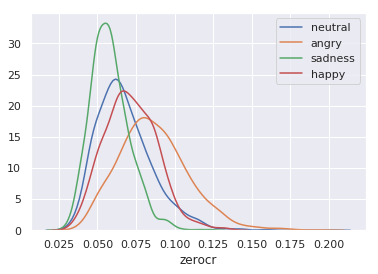

meancent


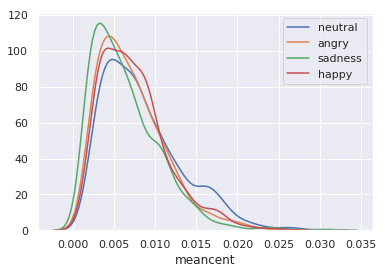

stdcent


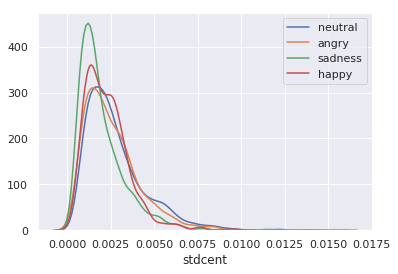

maxcent


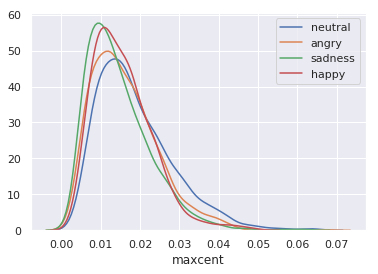

pitchmean


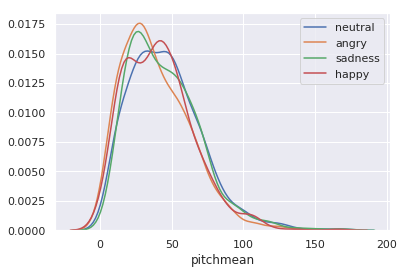

pitchmax


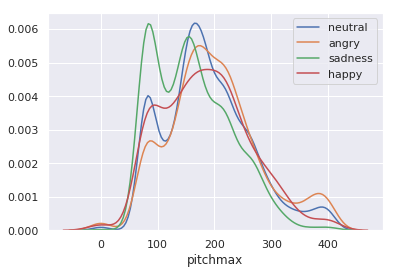

pitchmin


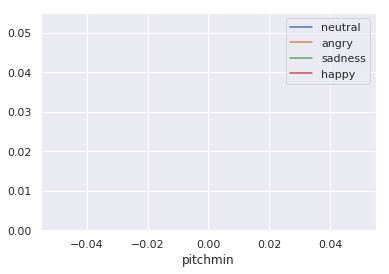

pitchstd


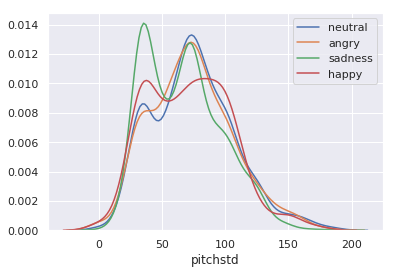

pitch_tuning_offset


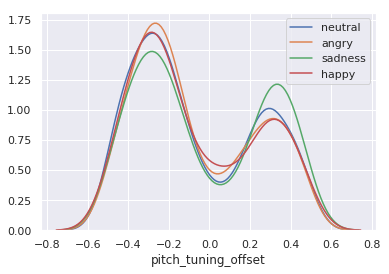

meanrms


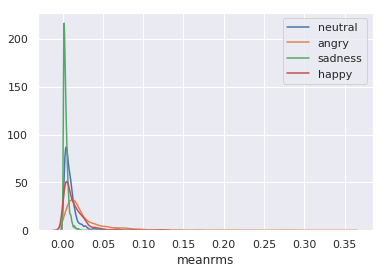

maxrms


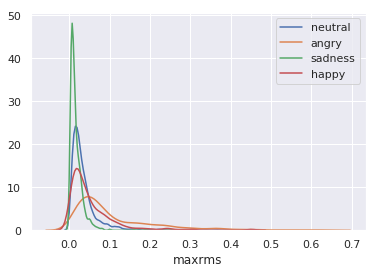

stdrms


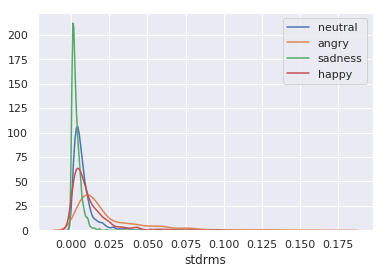

y_harmonic


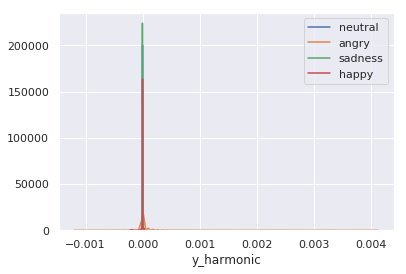

sig_mean


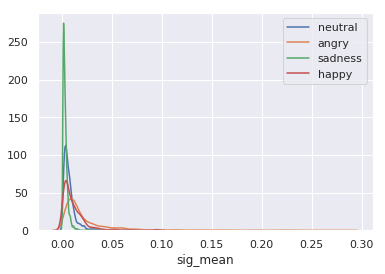

sig_std


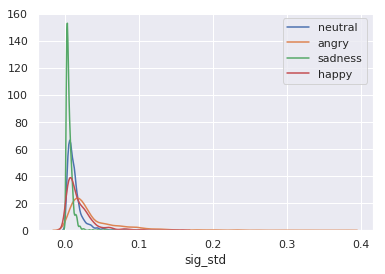

mfcc_1


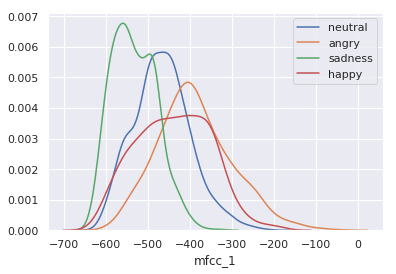

mfcc_2


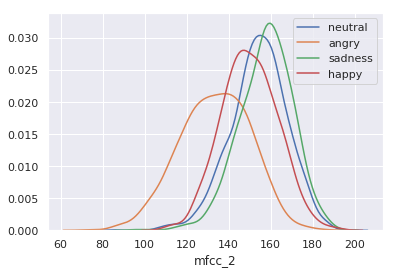

mfcc_3


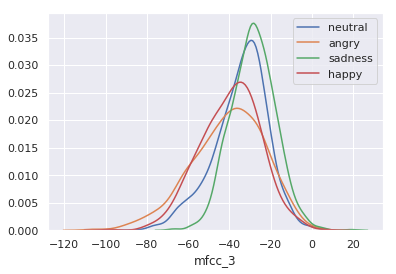

mfcc_4


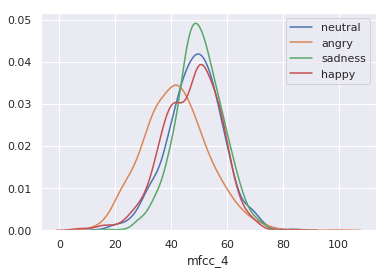

mfcc_5


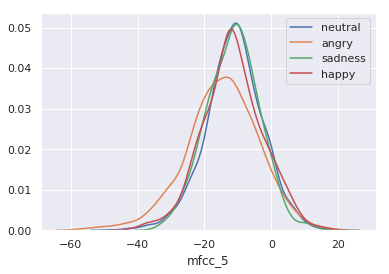

mfcc_6


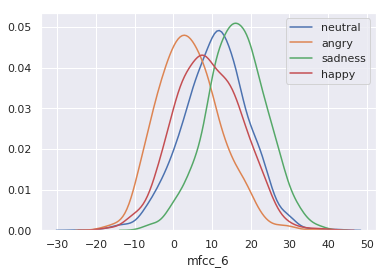

mfcc_7


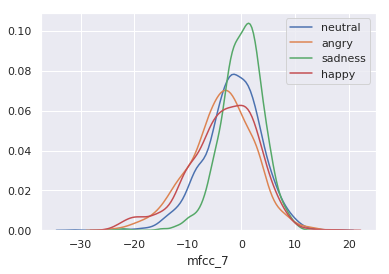

mfcc_8


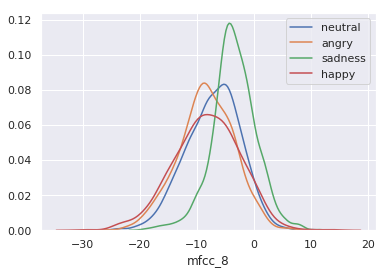

mfcc_9


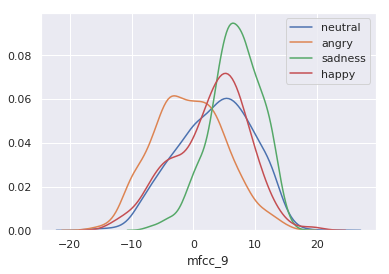

mfcc_10


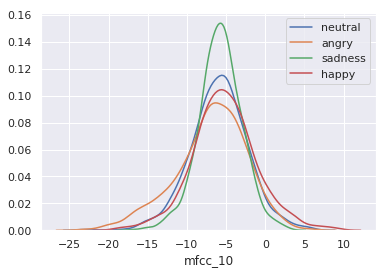

mfcc_11


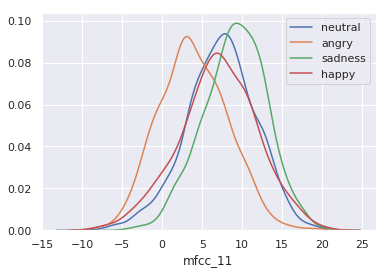

mfcc_12


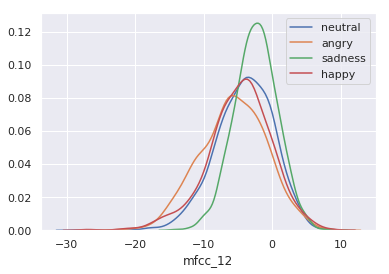

mfccstd_1


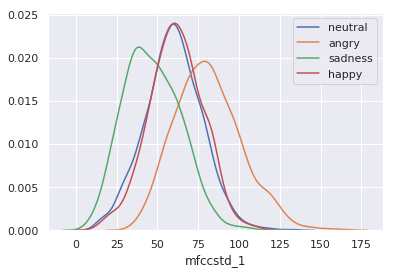

mfccstd_2


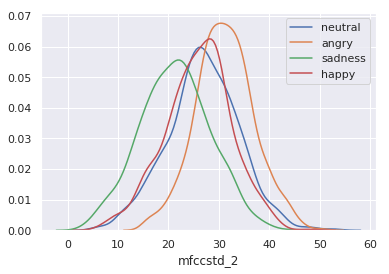

mfccstd_3


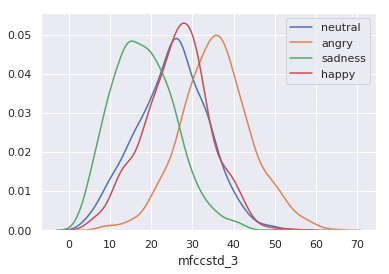

mfccstd_4


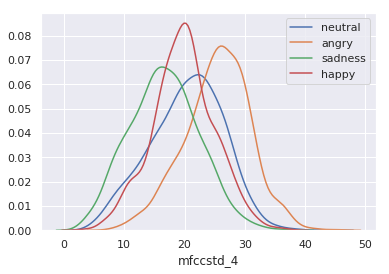

mfccstd_5


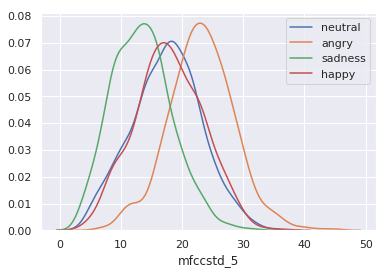

mfccstd_6


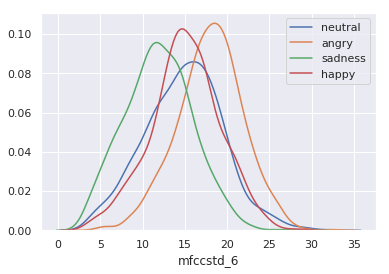

mfccstd_7


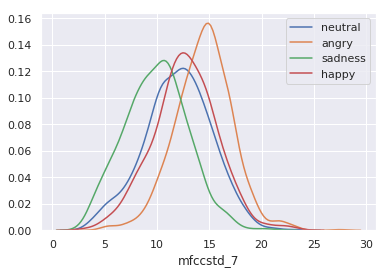

mfccstd_8


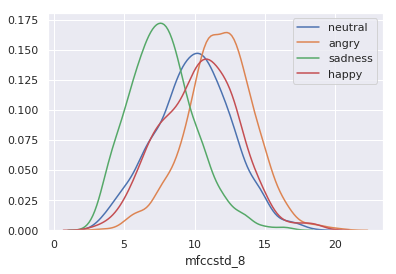

mfccstd_9


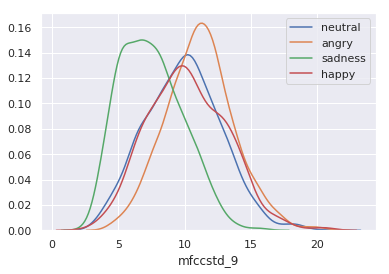

mfccstd_10


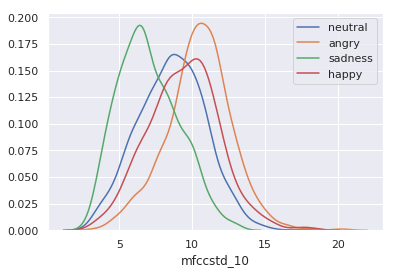

mfccstd_11


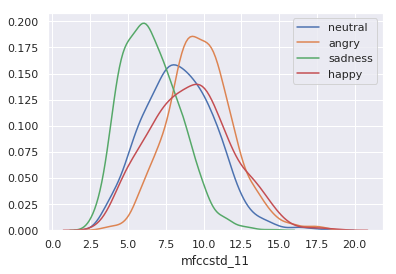

mfccstd_12


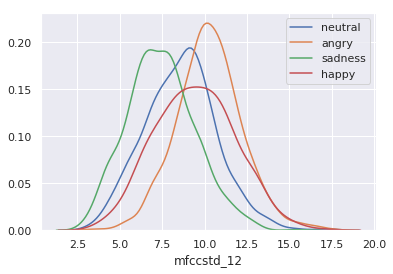

mfccmax_1


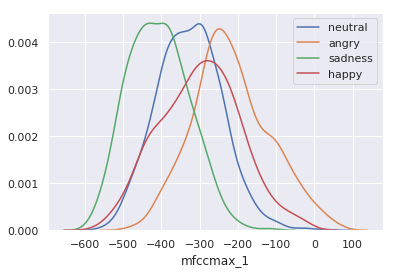

mfccmax_2


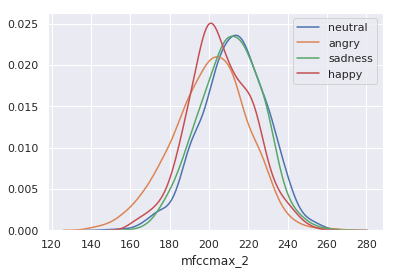

mfccmax_3


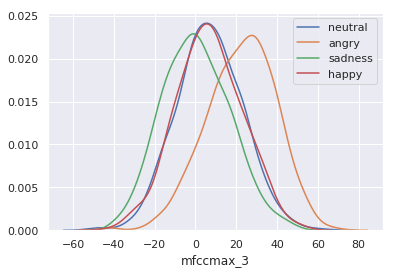

mfccmax_4


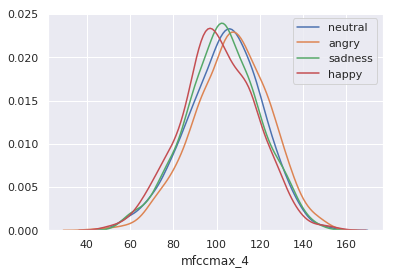

mfccmax_5


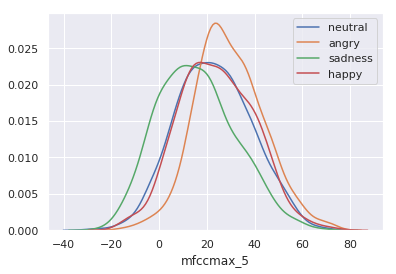

mfccmax_6


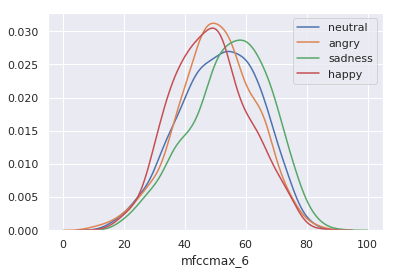

mfccmax_7


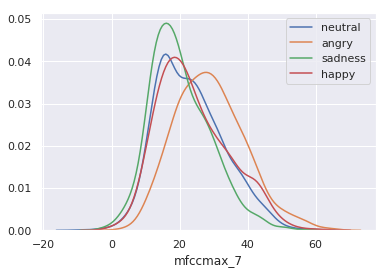

mfccmax_8


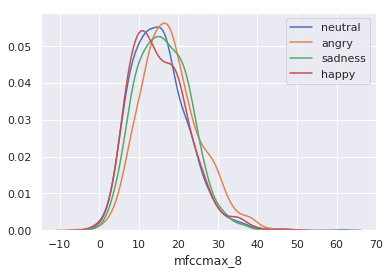

mfccmax_9


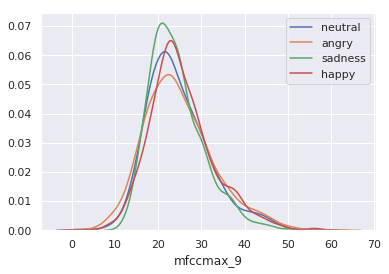

mfccmax_10


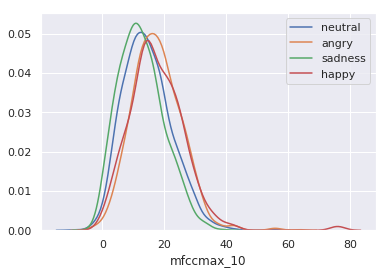

mfccmax_11


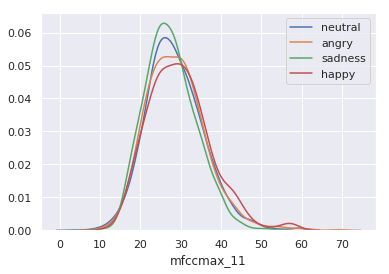

mfccmax_12


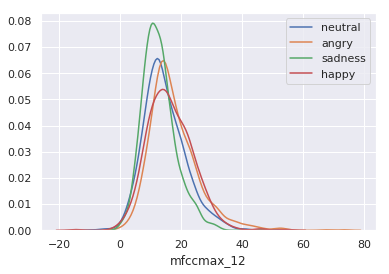

chroma1


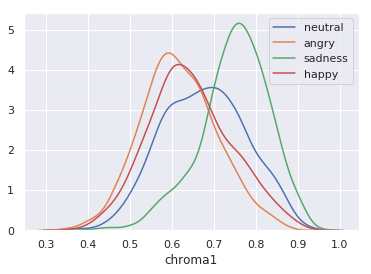

chroma2


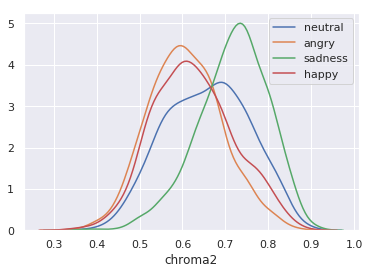

chroma3


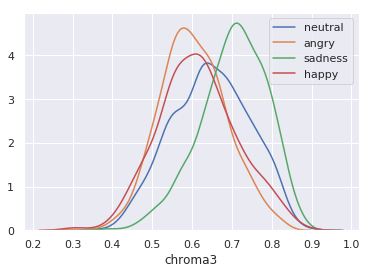

chroma4


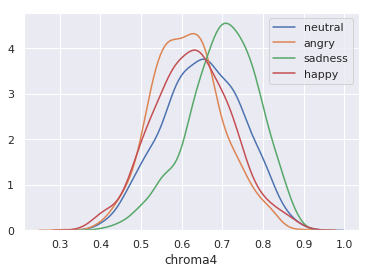

chroma5


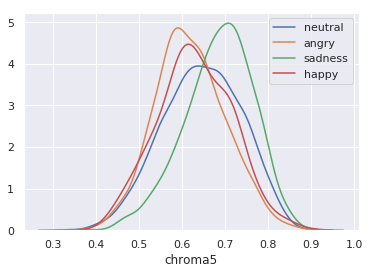

chroma6


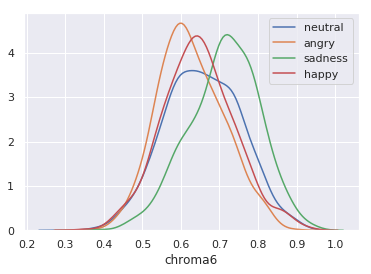

chroma7


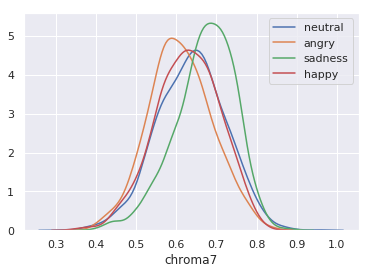

chroma8


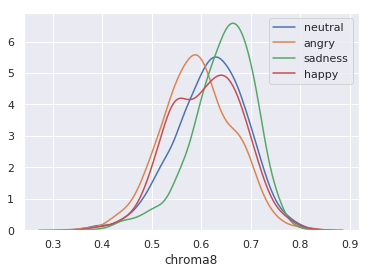

chroma9


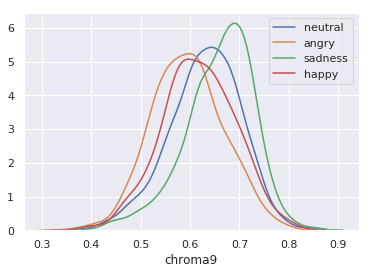

chroma10


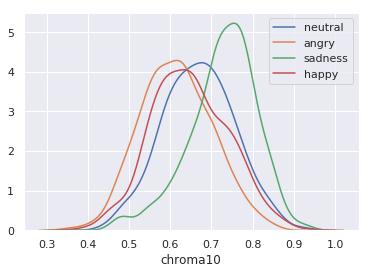

chroma11


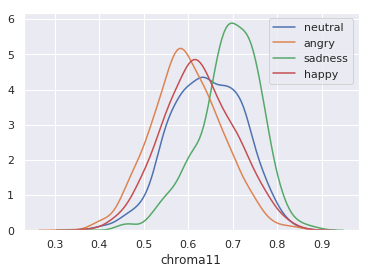

chroma12


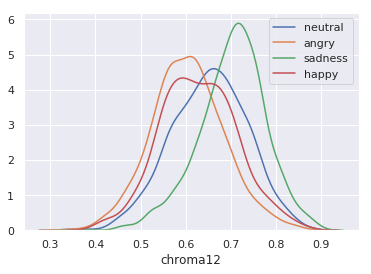

mel1


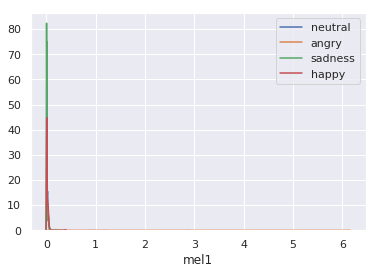

mel2


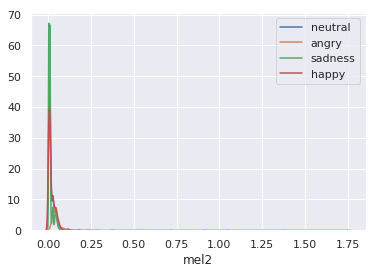

mel3


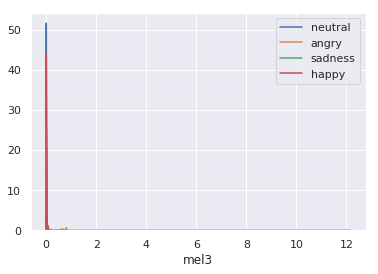

mel4


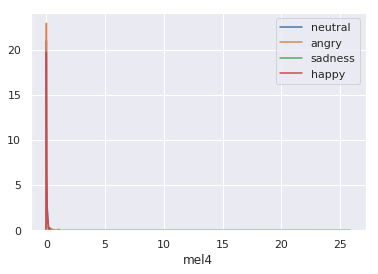

mel5


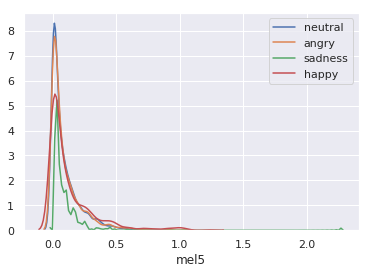

mel6


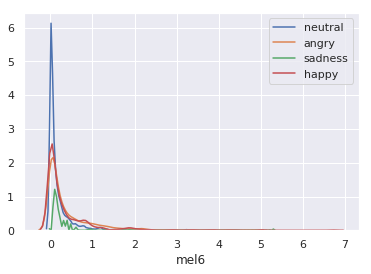

mel7


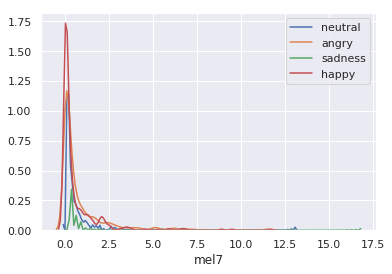

mel8


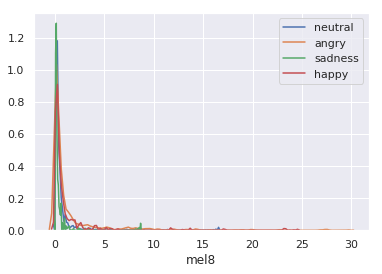

mel9


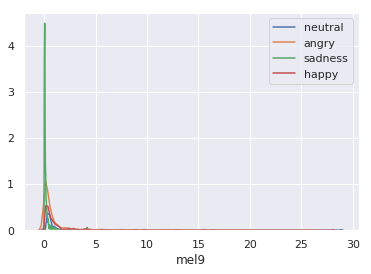

mel10


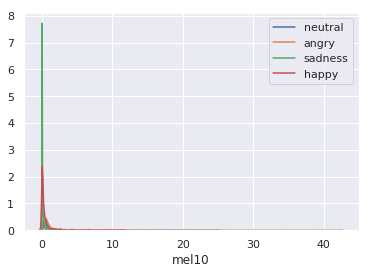

mel11


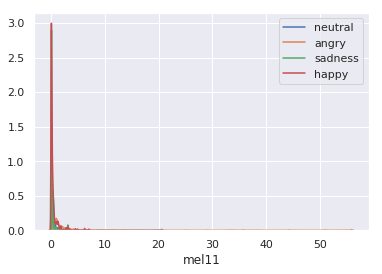

mel12


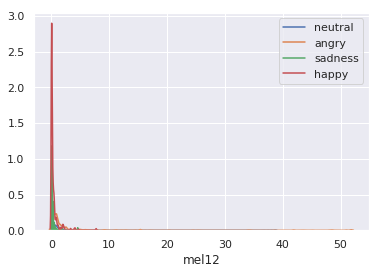

mel13


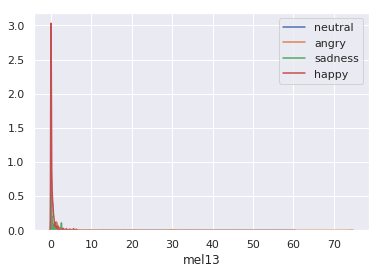

mel14


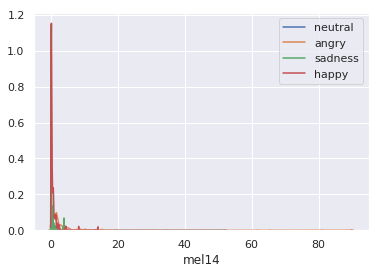

mel15


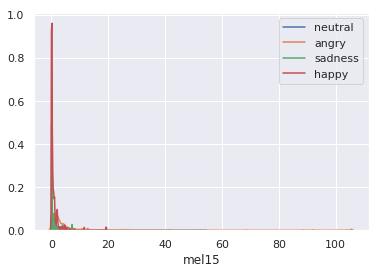

mel16


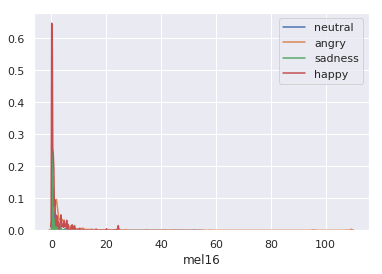

mel17


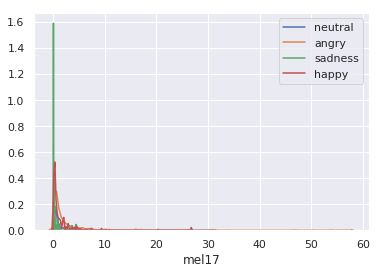

mel18


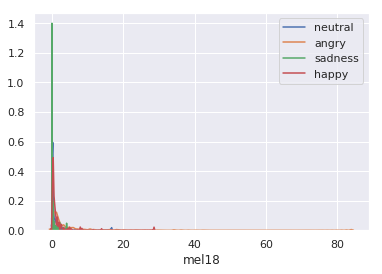

mel19


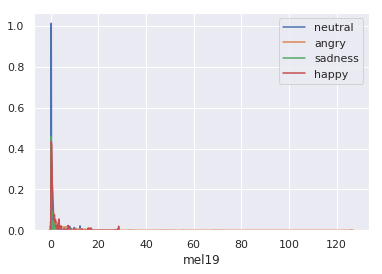

mel20


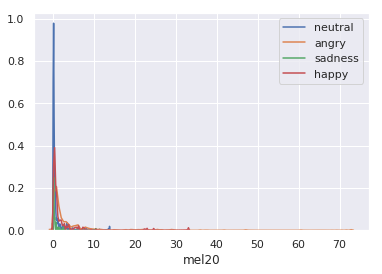

mel21


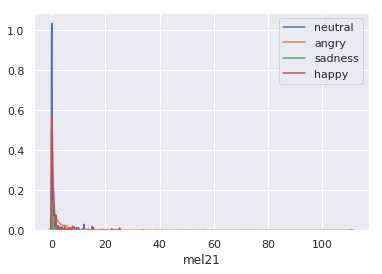

mel22


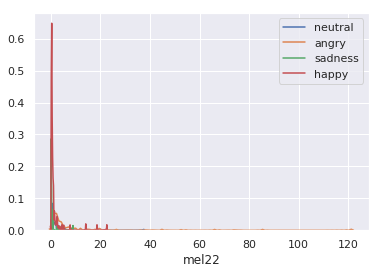

mel23


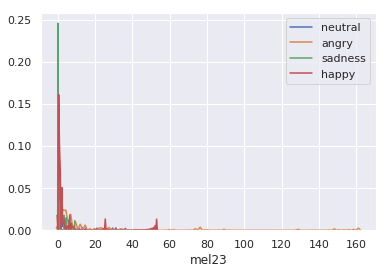

mel24


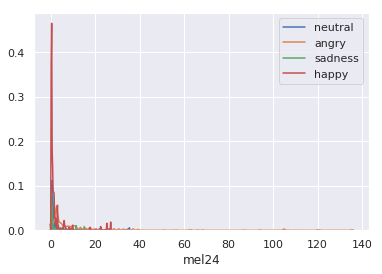

mel25


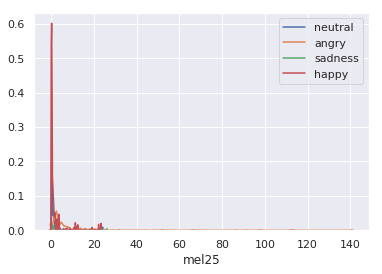

mel26


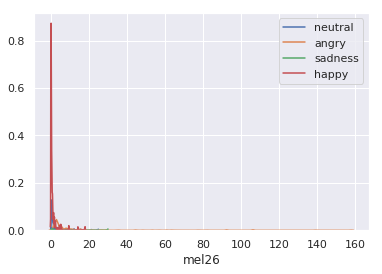

mel27


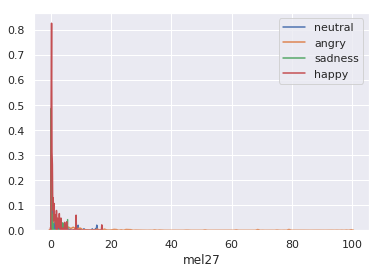

mel28


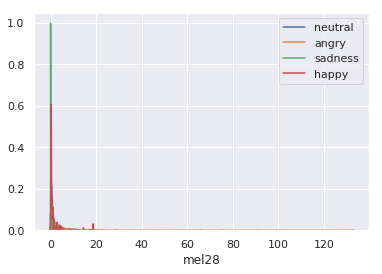

mel29


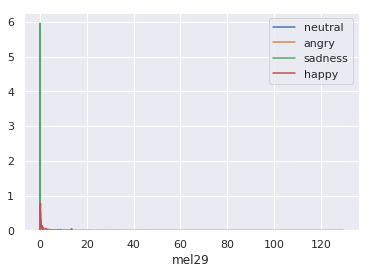

mel30


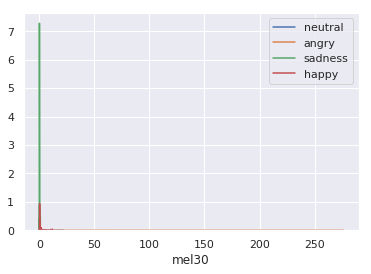

mel31


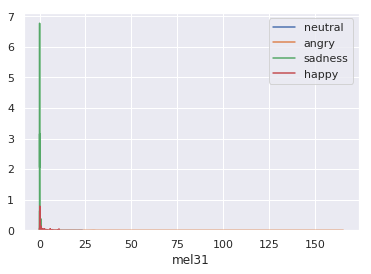

mel32


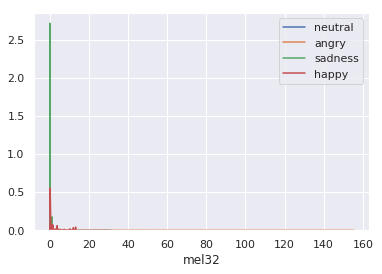

mel33


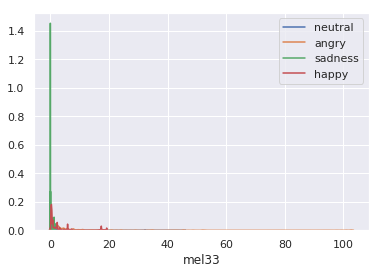

mel34


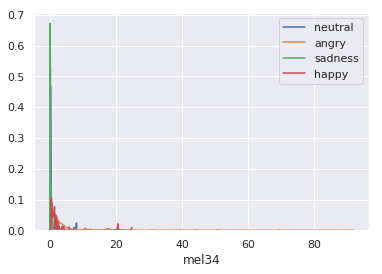

mel35


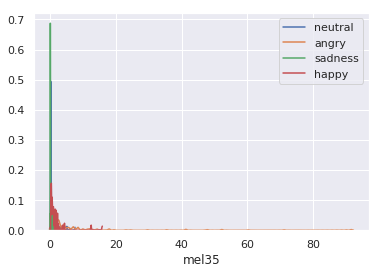

mel36


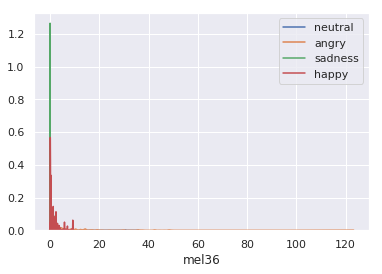

mel37


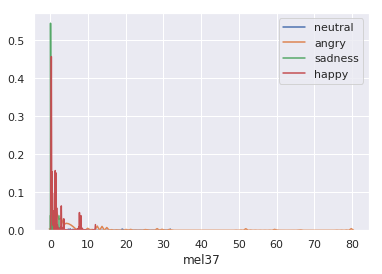

mel38


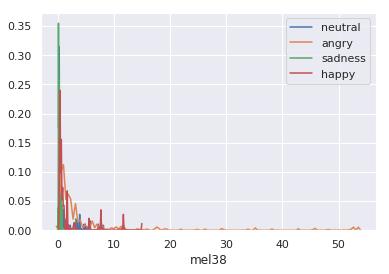

mel39


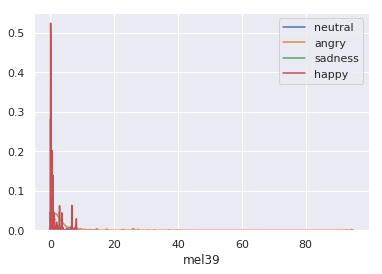

mel40


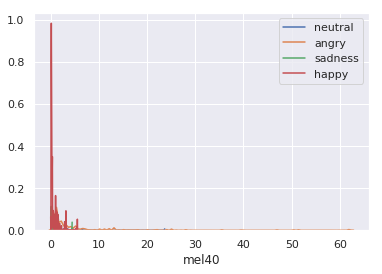

mel41


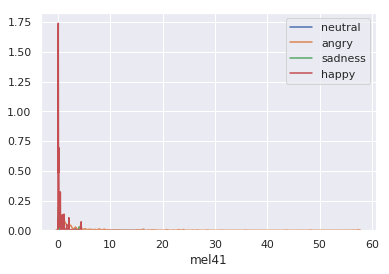

mel42


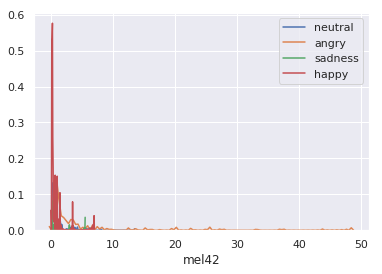

mel43


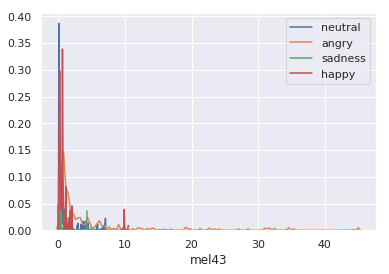

mel44


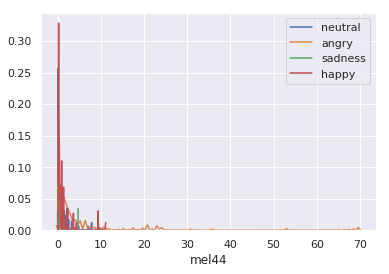

mel45


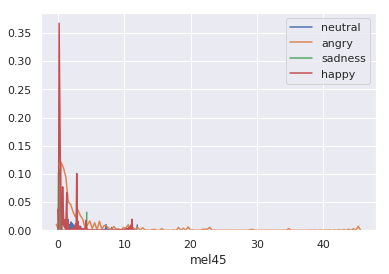

mel46


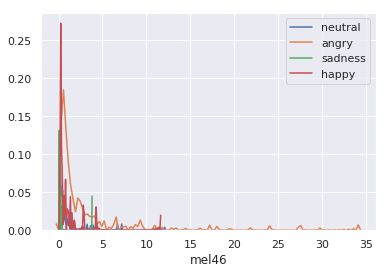

mel47


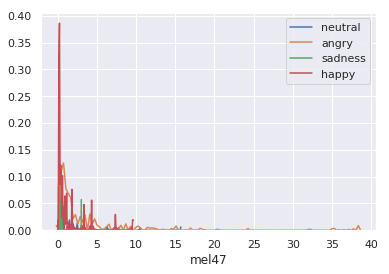

mel48


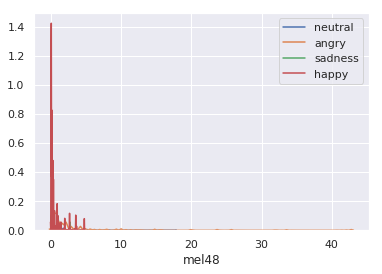

mel49


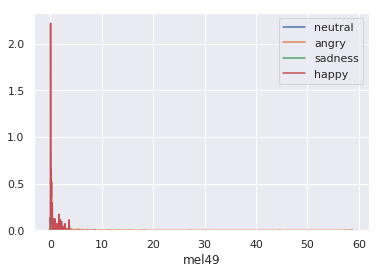

mel50


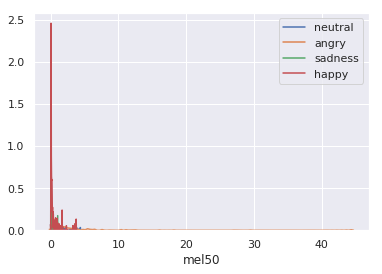

mel51


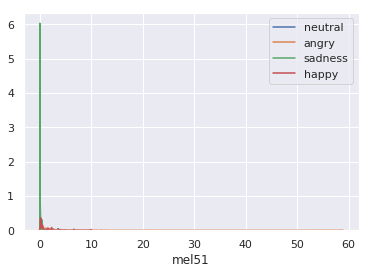

mel52


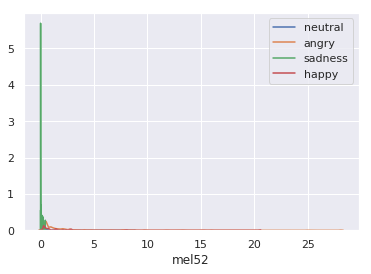

mel53


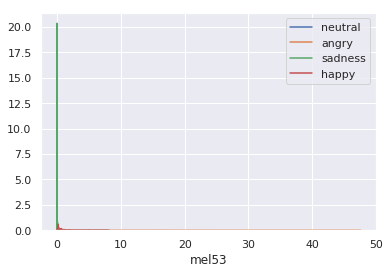

mel54


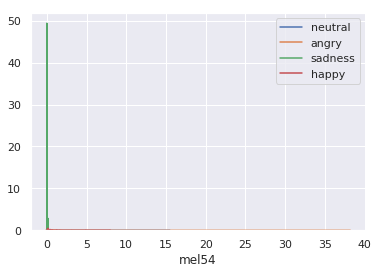

mel55


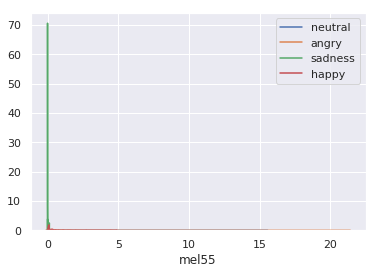

mel56


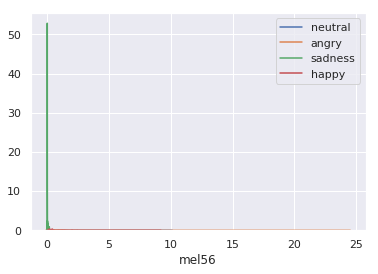

mel57


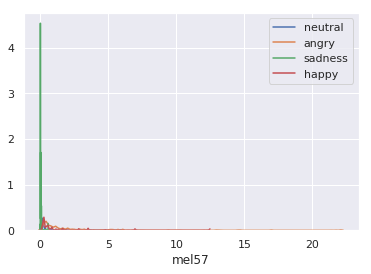

mel58


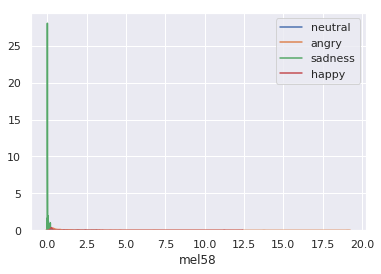

mel59


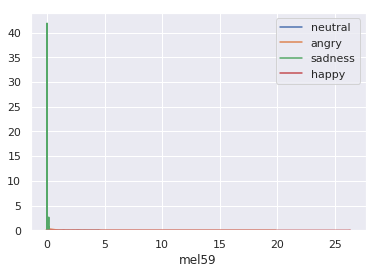

mel60


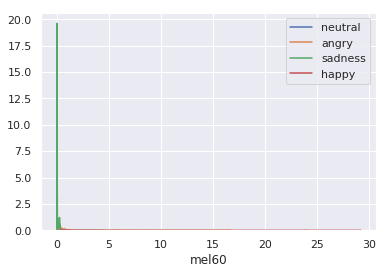

mel61


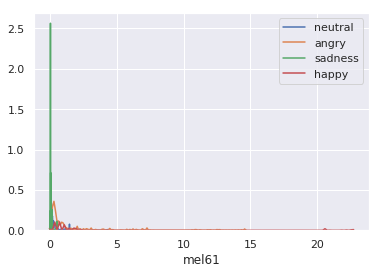

mel62


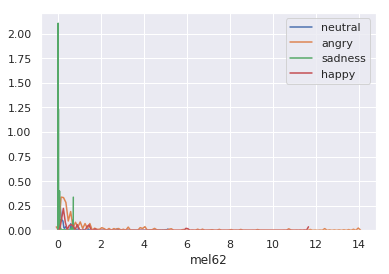

mel63


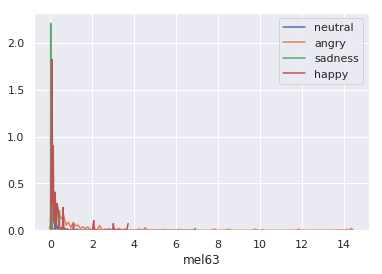

mel64


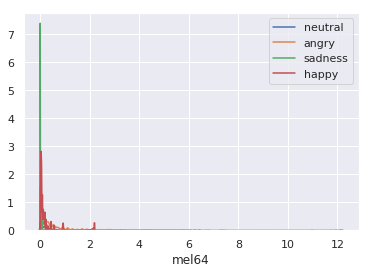

mel65


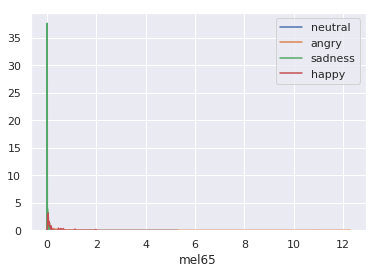

mel66


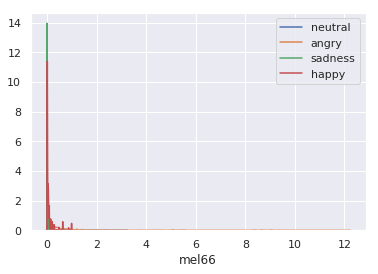

mel67


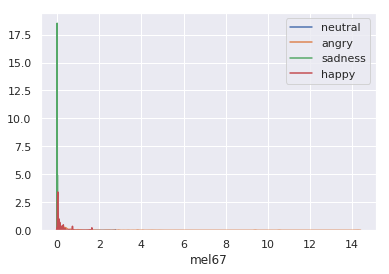

mel68


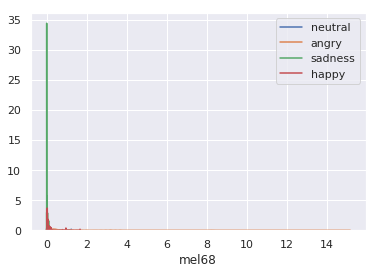

mel69


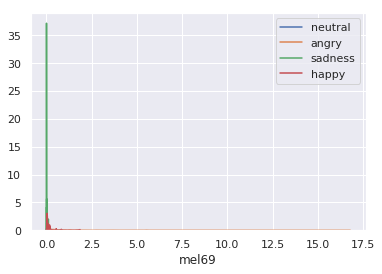

mel70


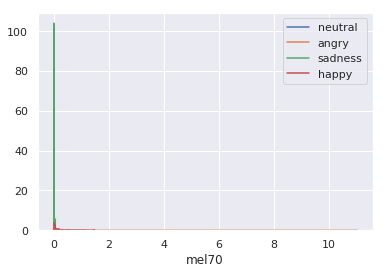

mel71


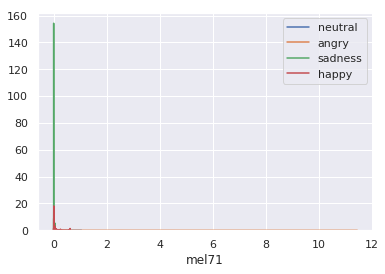

mel72


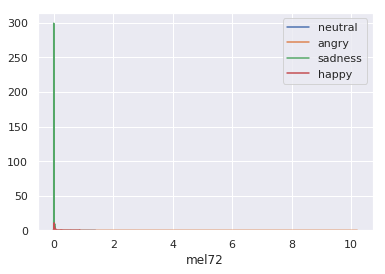

mel73


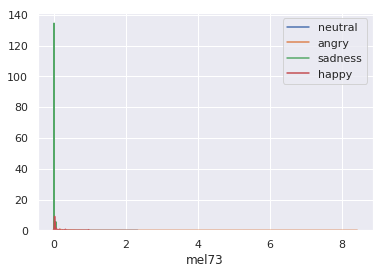

mel74


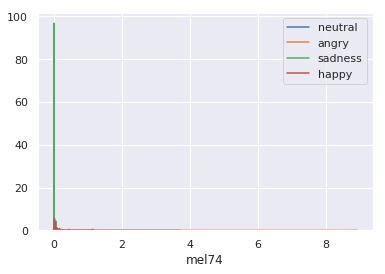

mel75


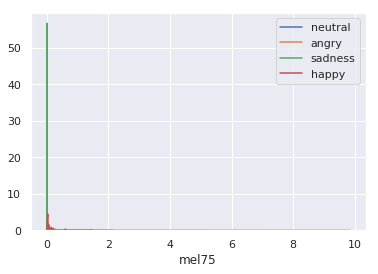

mel76


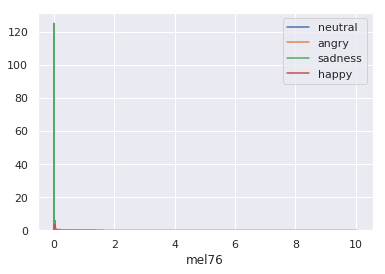

mel77


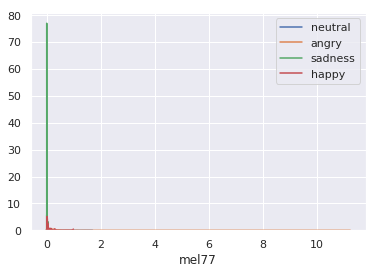

mel78


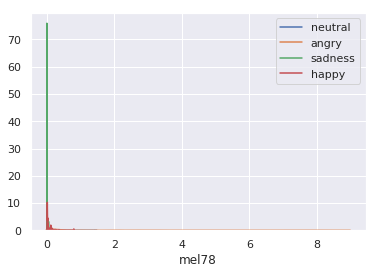

mel79


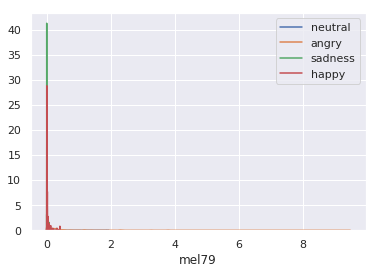

mel80


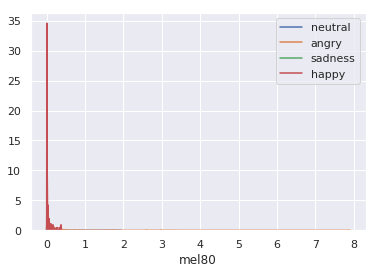

mel81


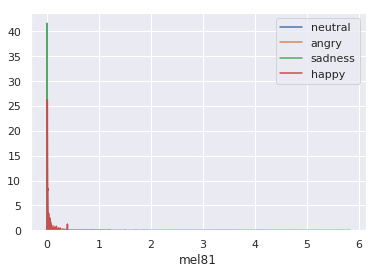

mel82


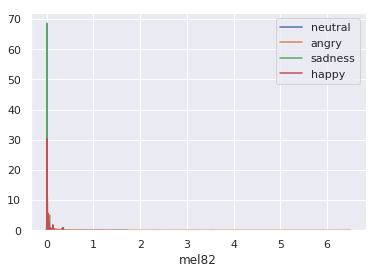

mel83


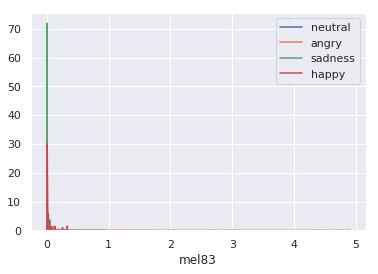

mel84


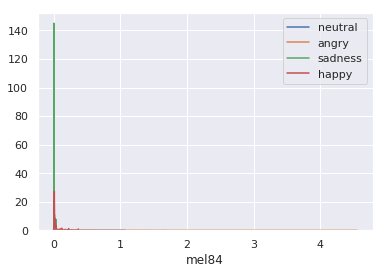

mel85


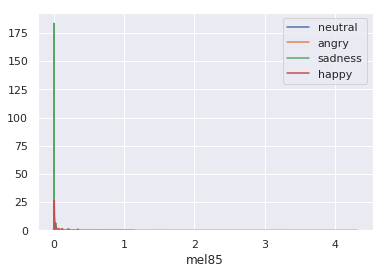

mel86


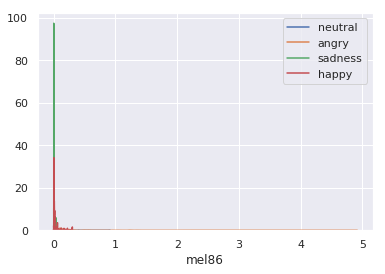

mel87


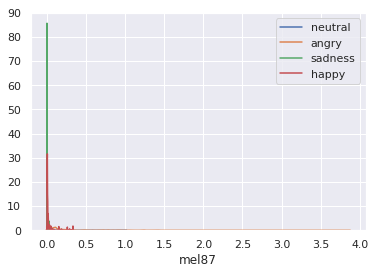

mel88


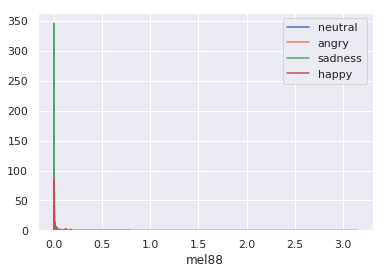

mel89


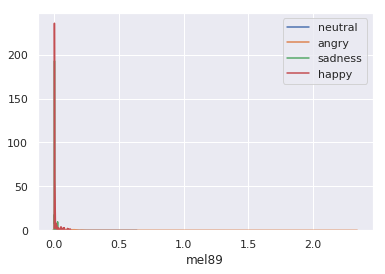

mel90


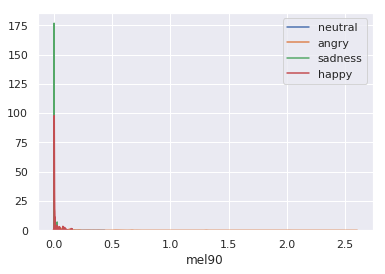

mel91


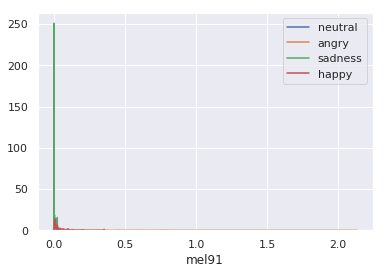

mel92


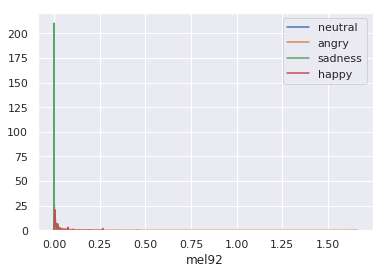

mel93


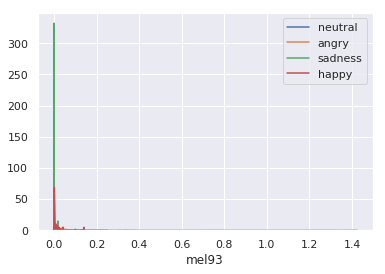

mel94


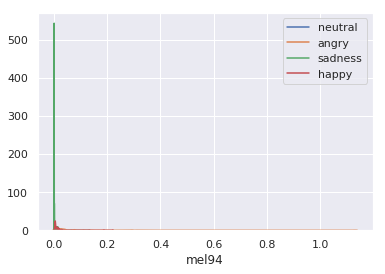

mel95


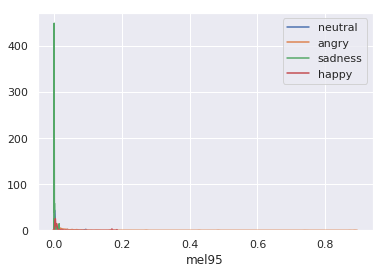

mel96


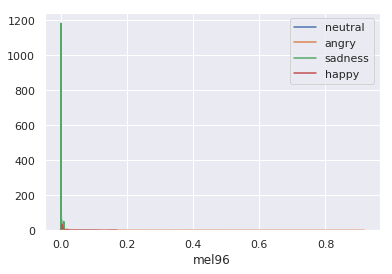

mel97


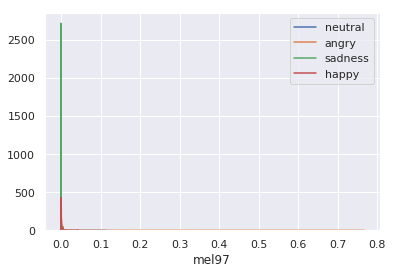

mel98


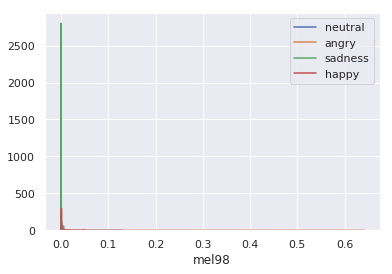

mel99


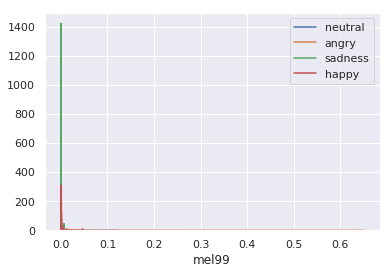

mel100


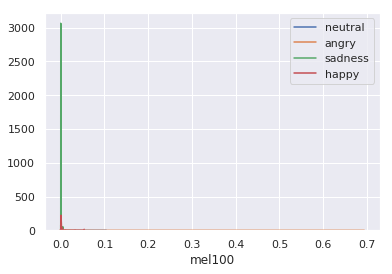

mel101


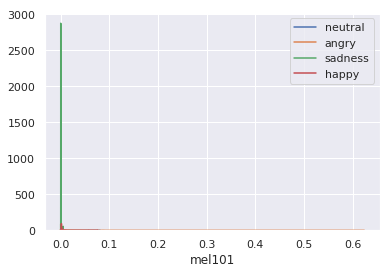

mel102


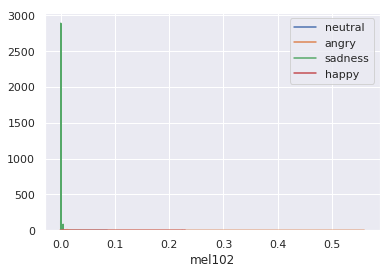

mel103


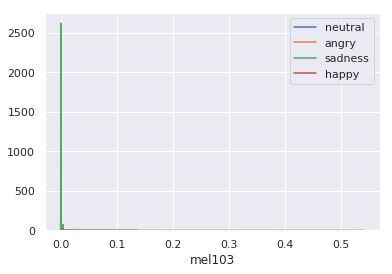

mel104


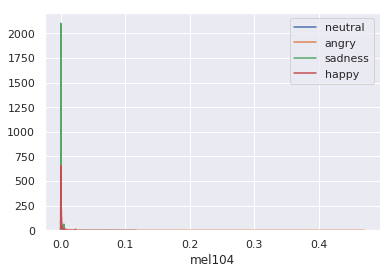

mel105


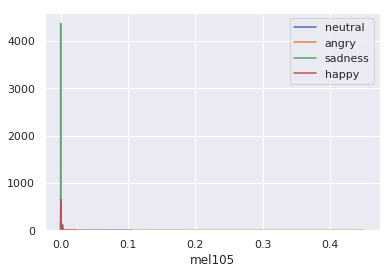

mel106


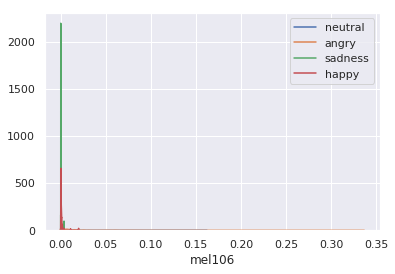

mel107


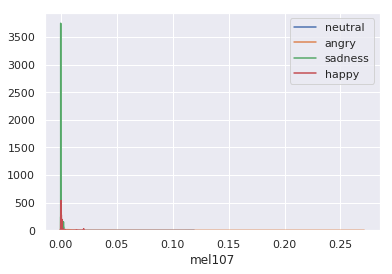

mel108


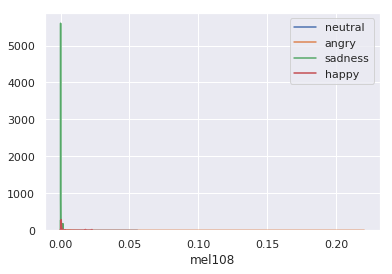

mel109


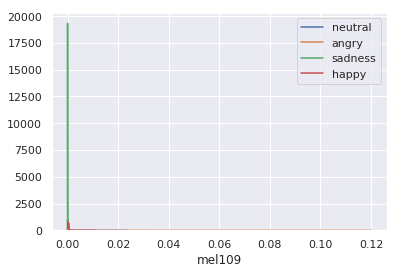

mel110


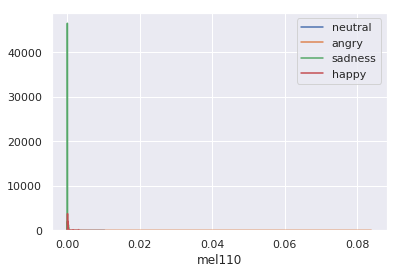

mel111


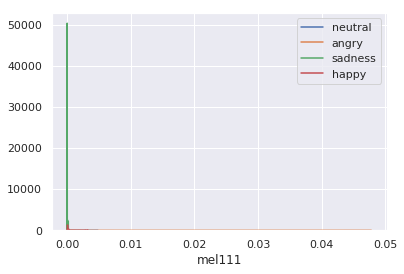

mel112


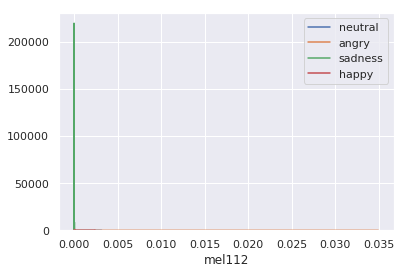

mel113


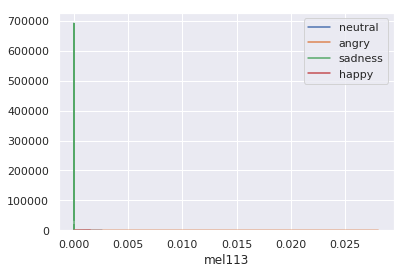

mel114


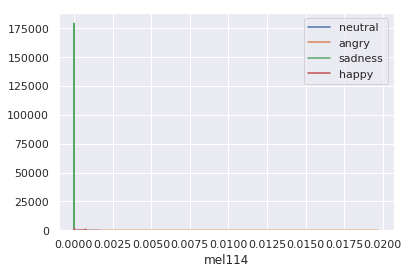

mel115


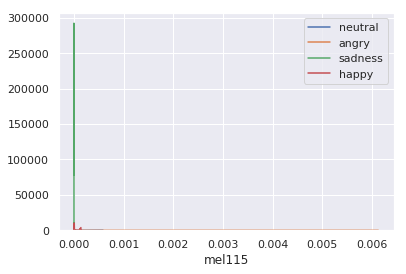

mel116


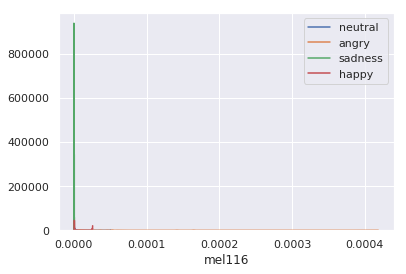

mel117


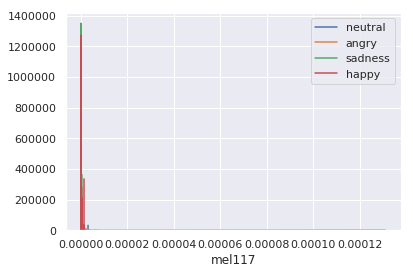

mel118


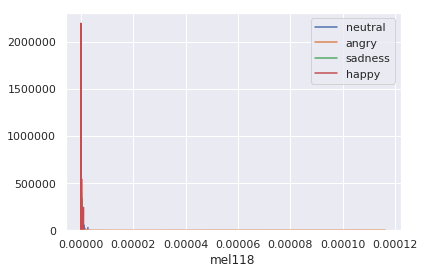

mel119


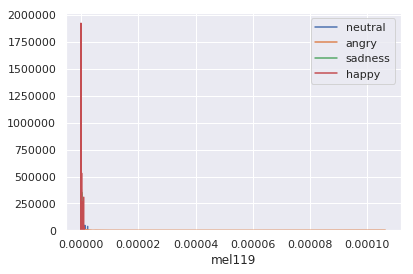

mel120


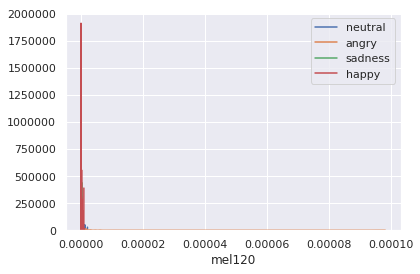

mel121


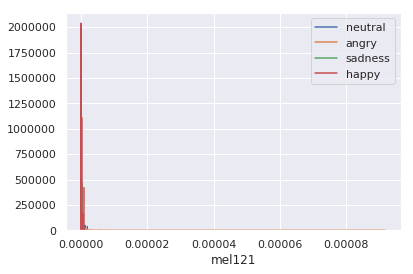

mel122


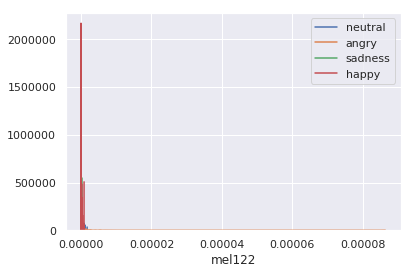

mel123


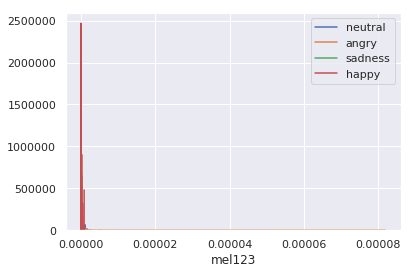

mel124


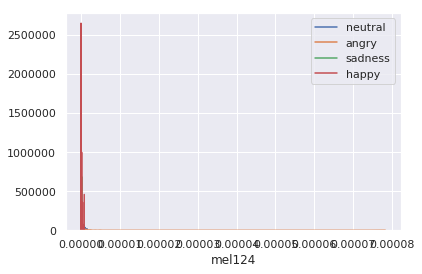

mel125


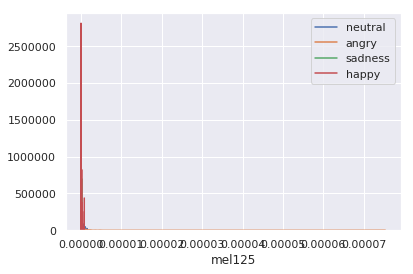

mel126


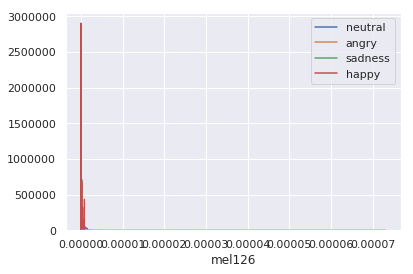

mel127


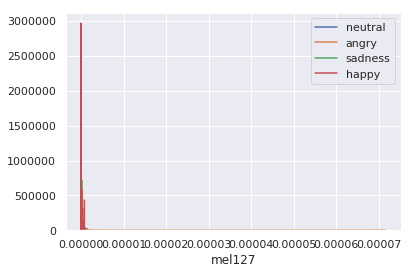

mel128


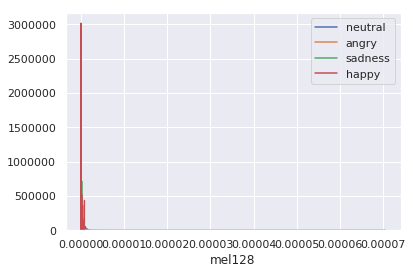

contrast1


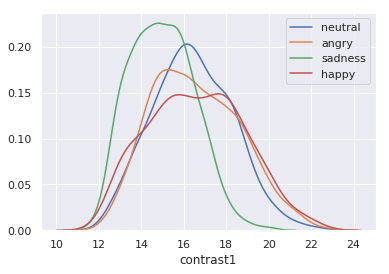

contrast2


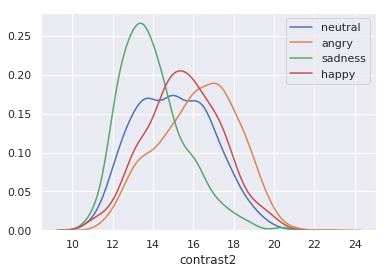

contrast3


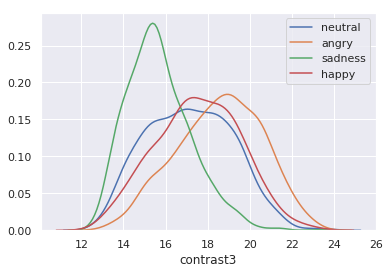

contrast4


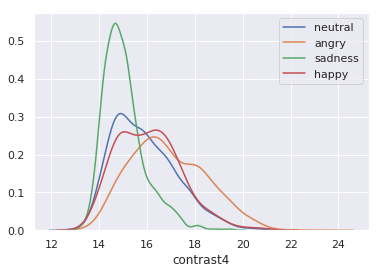

contrast5


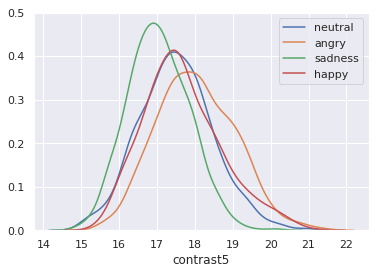

contrast6


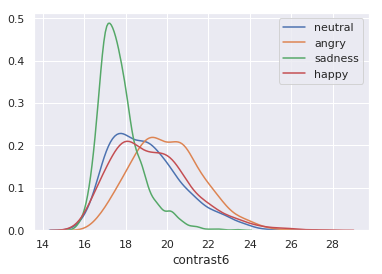

contrast7


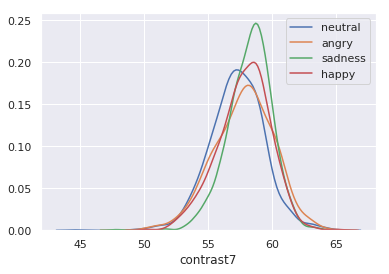

In [29]:
sns.set()
# sns.distplot(audio_4emotions["mfcc_1"], hist = False, kde = True,kde_kws = {'linewidth': 3},label = emotion)
# plt.show()
for col in columns:
    print(col)
    sns.distplot(audio_4emotions.loc[audio_4emotions['emotion'] == 'neutral', col], hist = False, kde = True, label="neutral")
    sns.distplot(audio_4emotions.loc[audio_4emotions['emotion'] == 'angry', col], hist = False, kde = True, label="angry")
    sns.distplot(audio_4emotions.loc[audio_4emotions['emotion'] == 'sadness', col], hist = False, kde = True, label="sadness")
    sns.distplot(audio_4emotions.loc[audio_4emotions['emotion'] == 'happy', col], hist = False, kde = True, label="happy")
    plt.show()

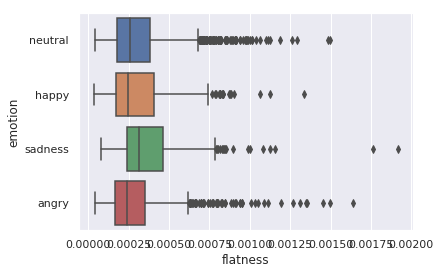

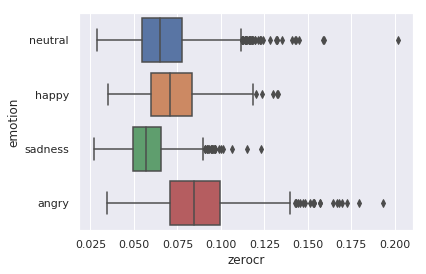

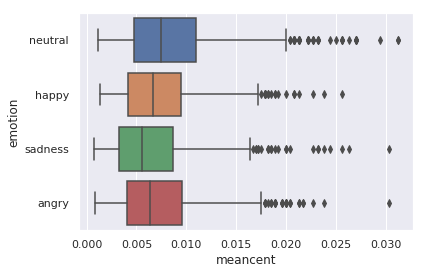

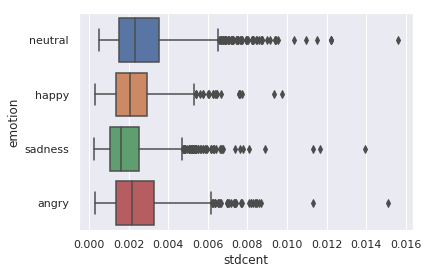

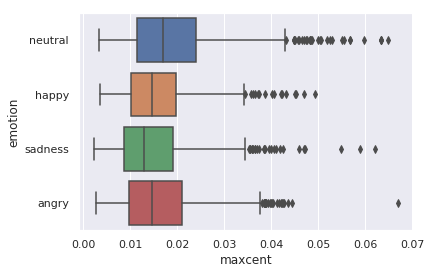

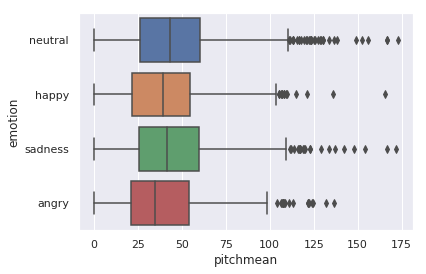

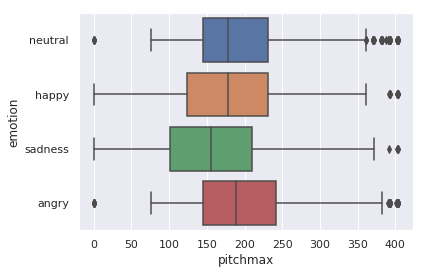

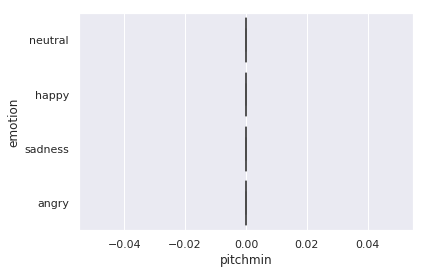

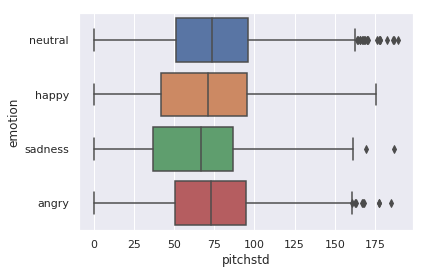

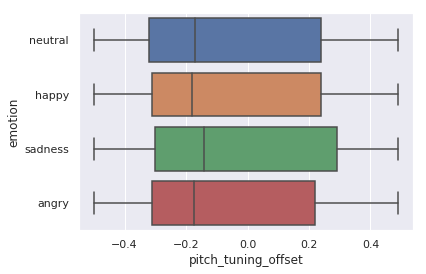

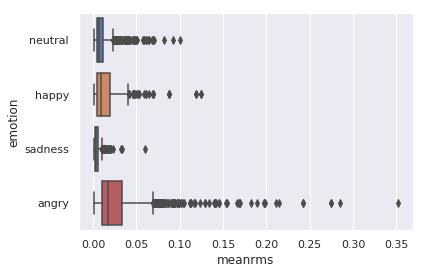

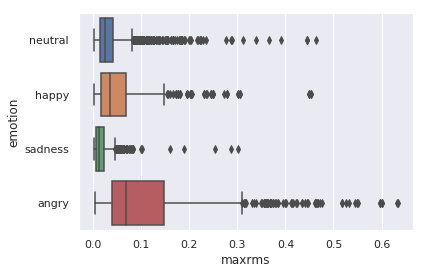

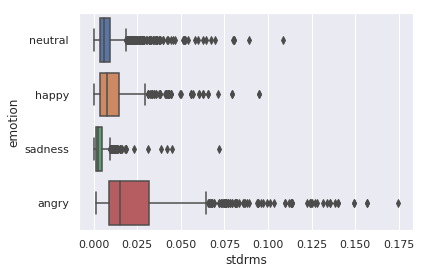

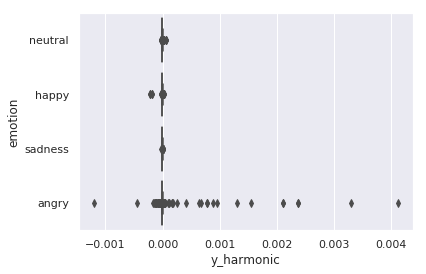

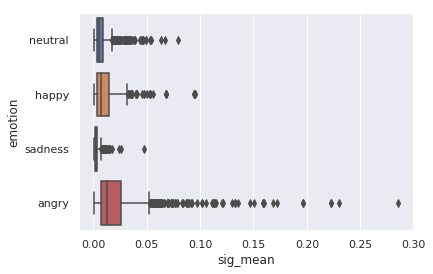

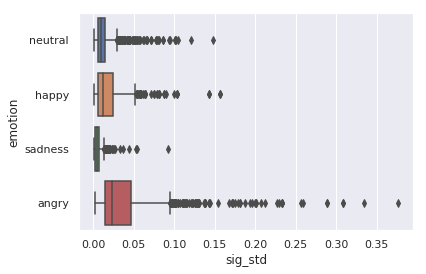

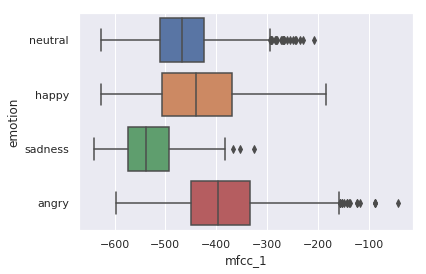

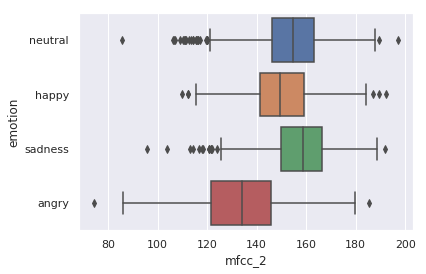

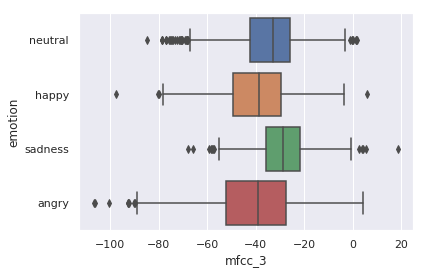

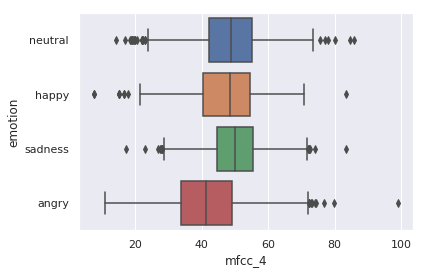

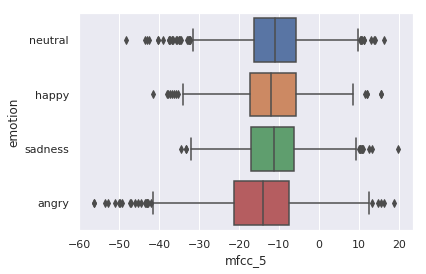

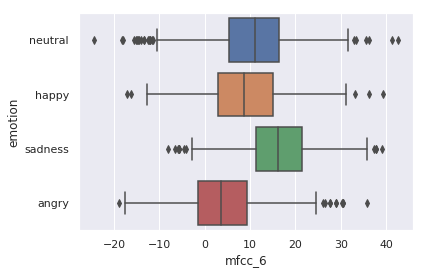

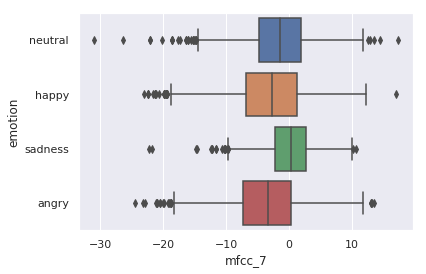

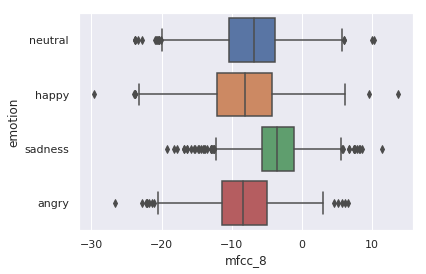

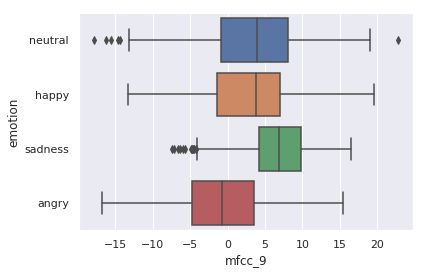

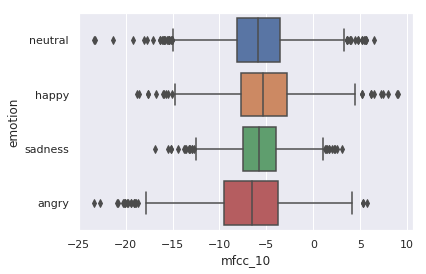

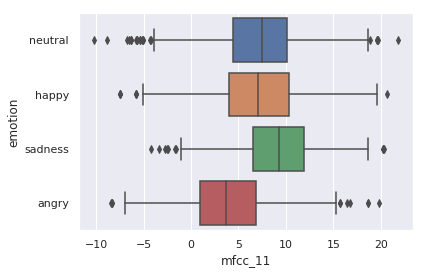

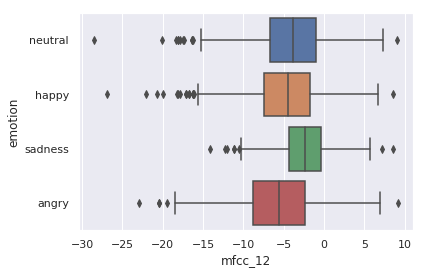

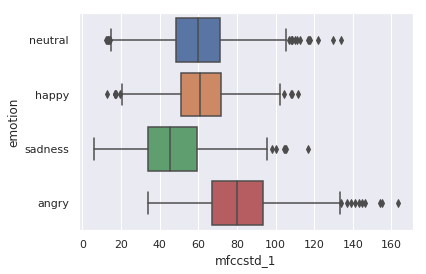

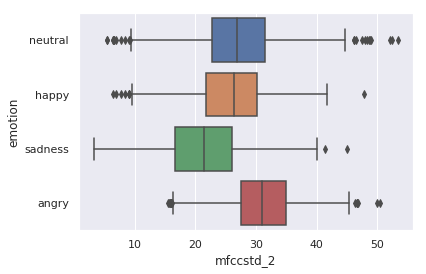

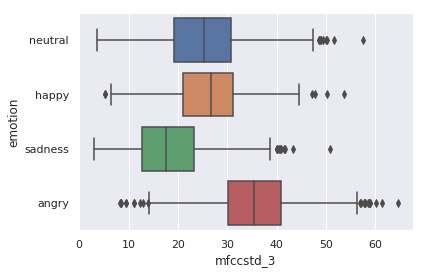

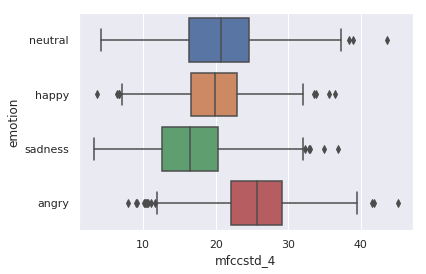

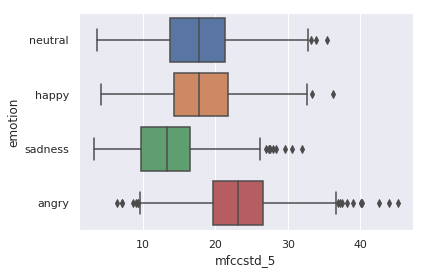

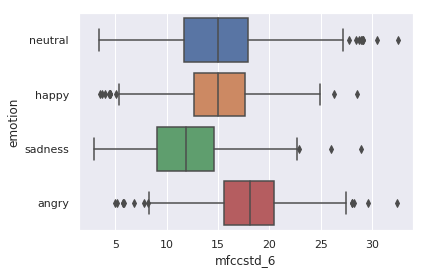

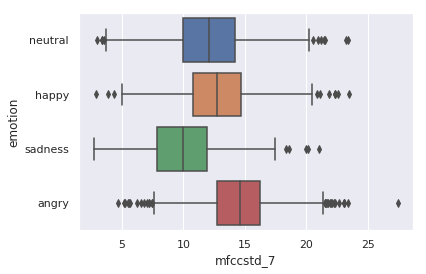

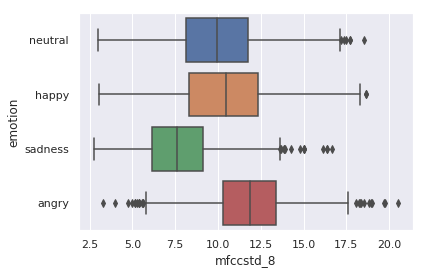

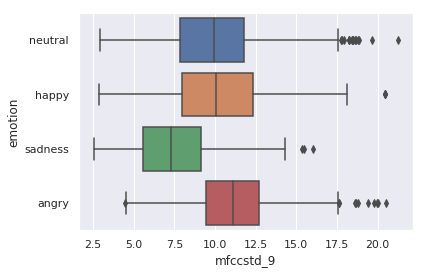

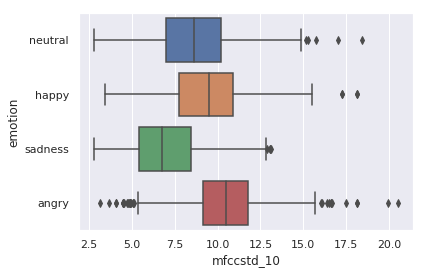

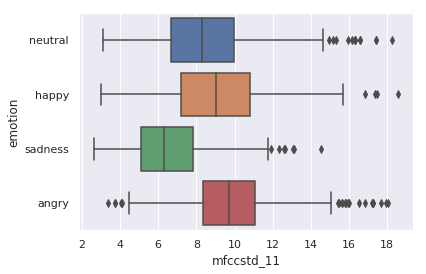

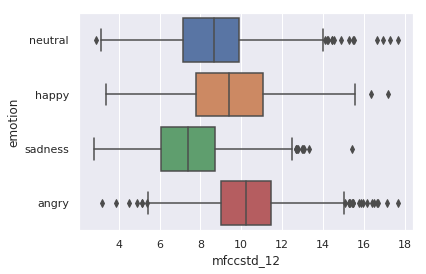

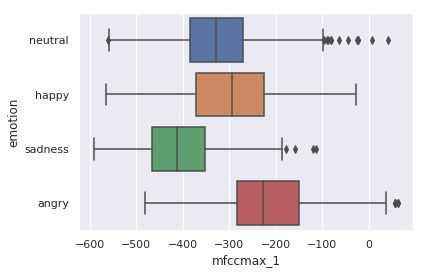

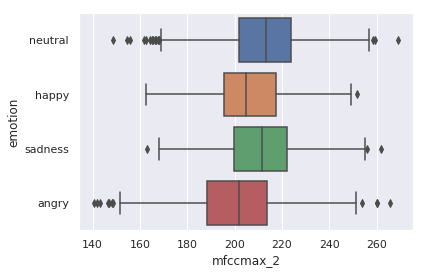

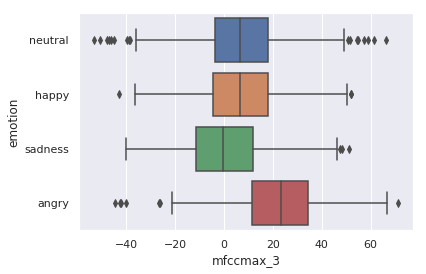

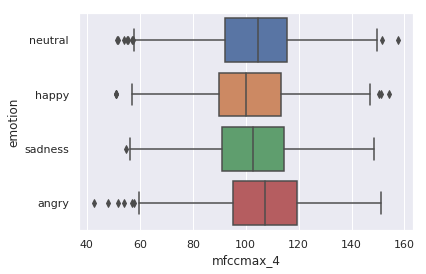

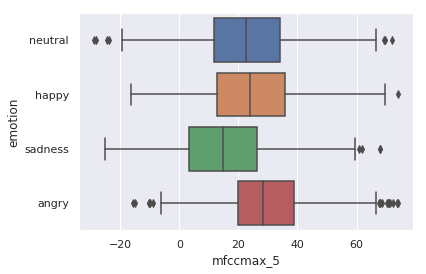

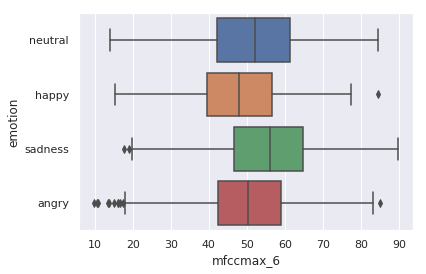

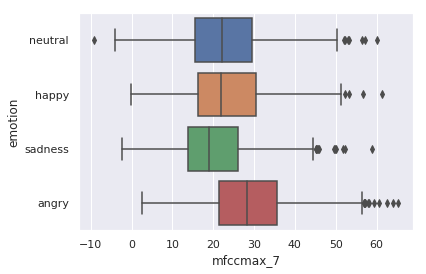

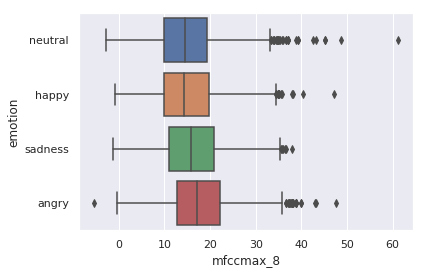

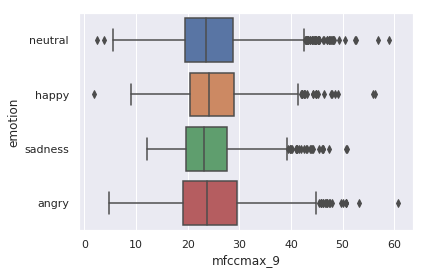

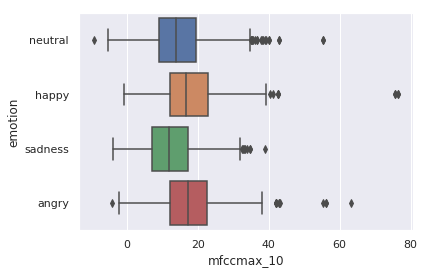

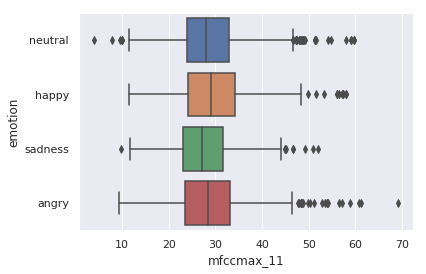

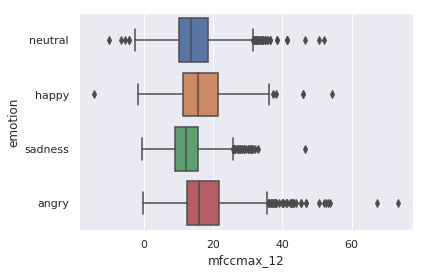

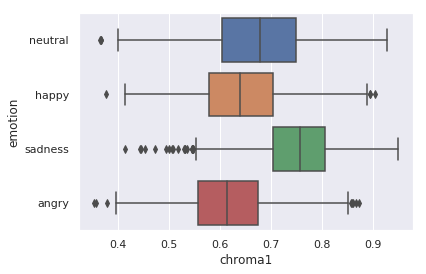

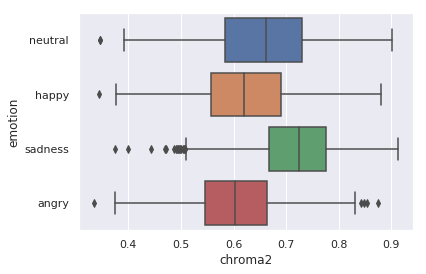

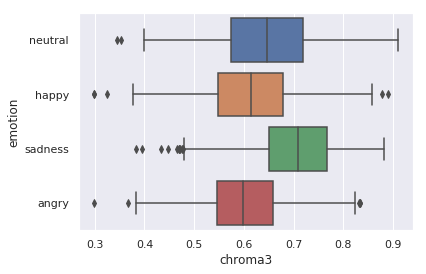

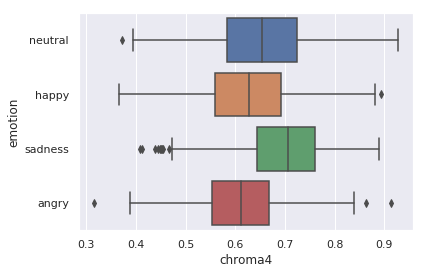

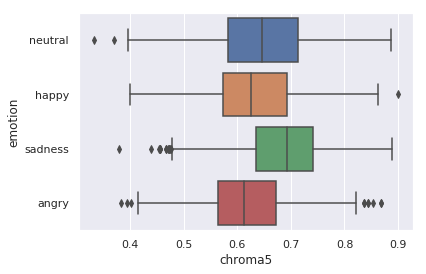

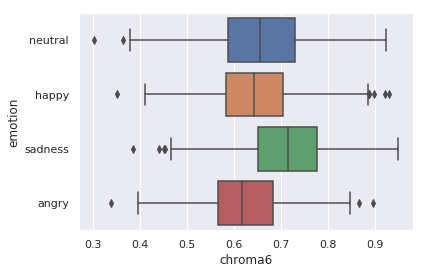

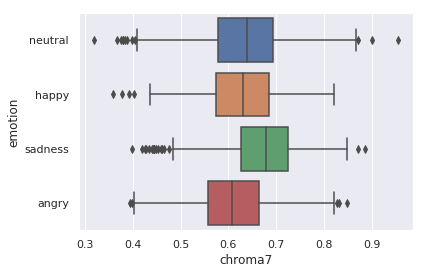

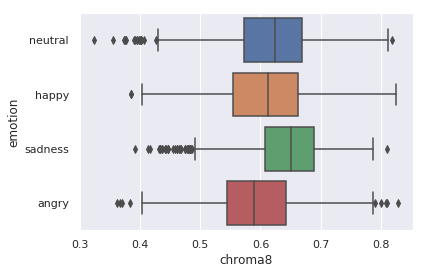

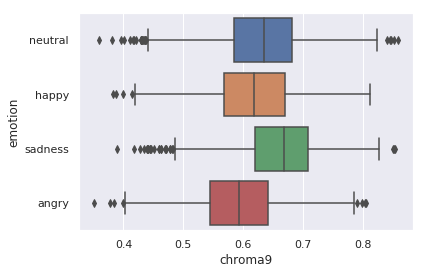

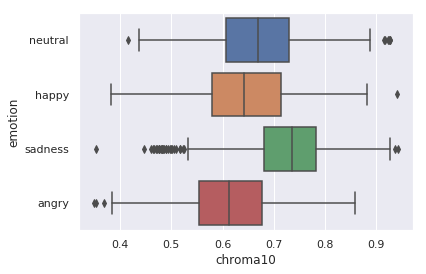

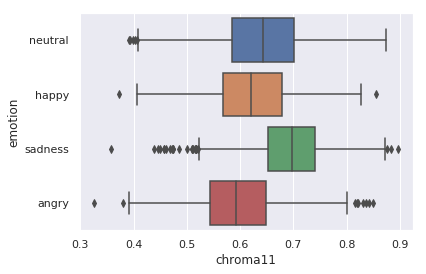

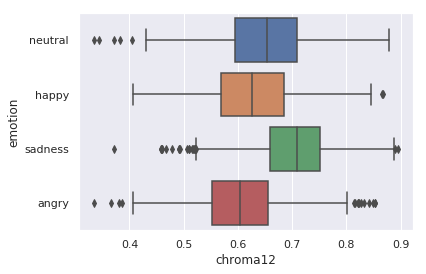

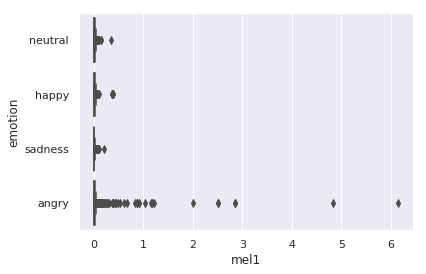

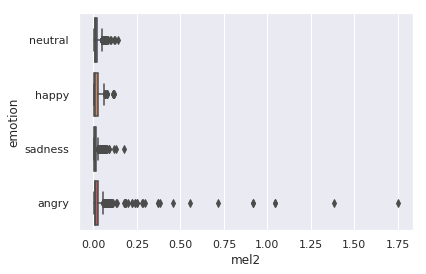

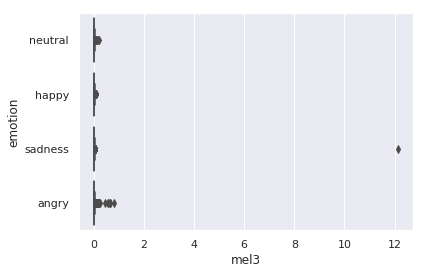

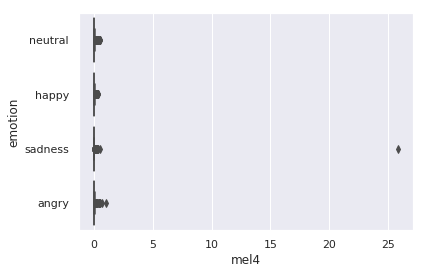

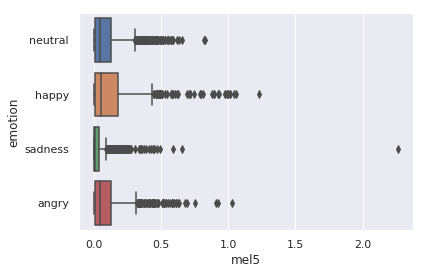

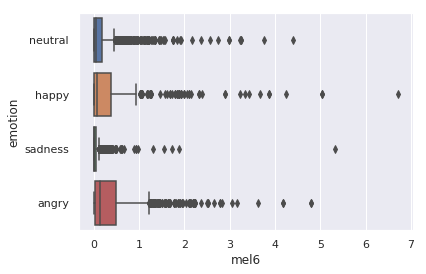

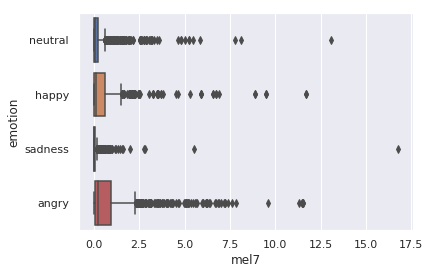

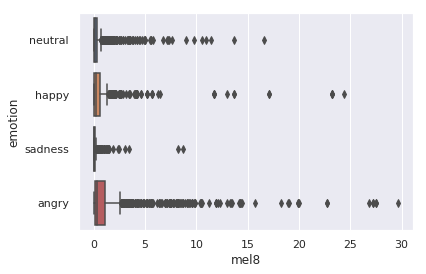

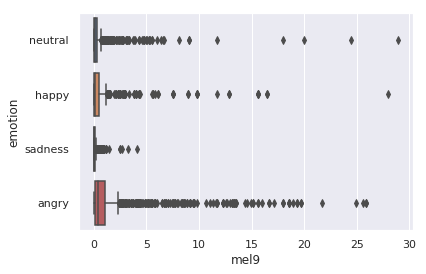

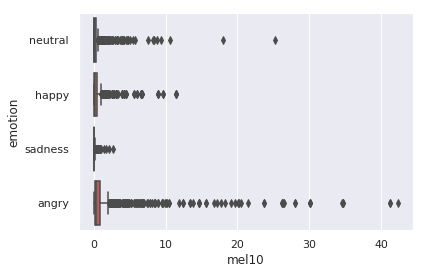

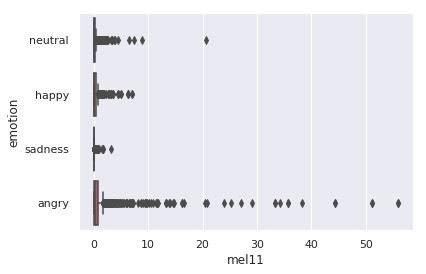

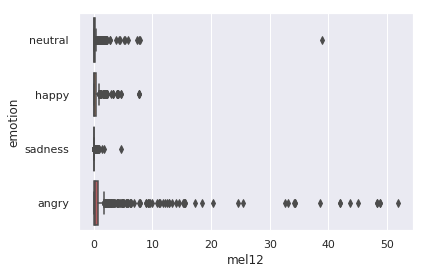

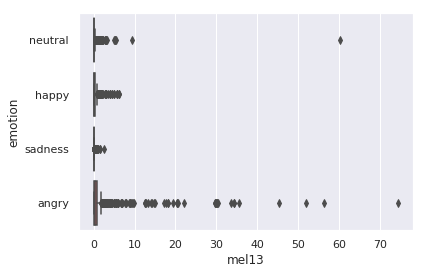

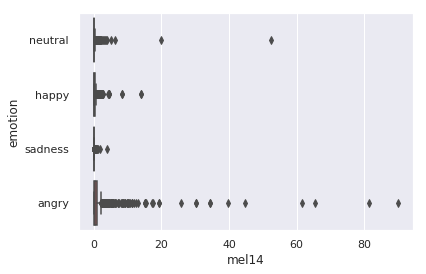

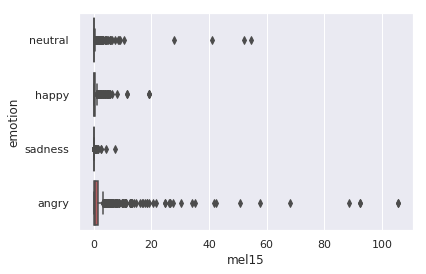

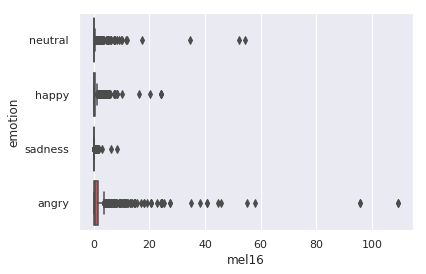

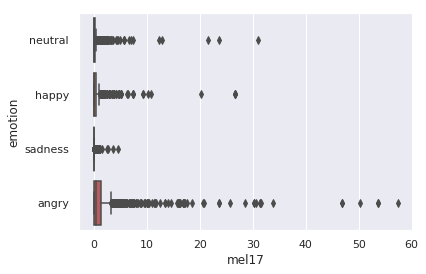

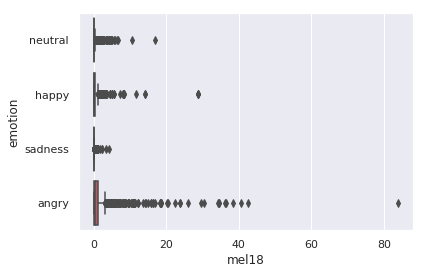

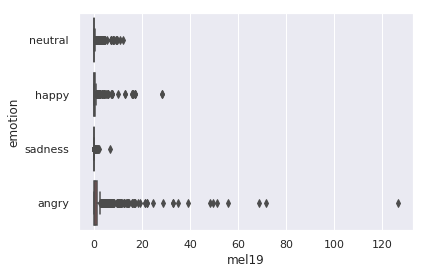

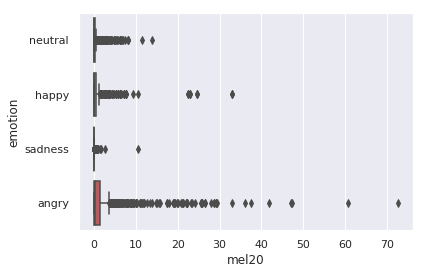

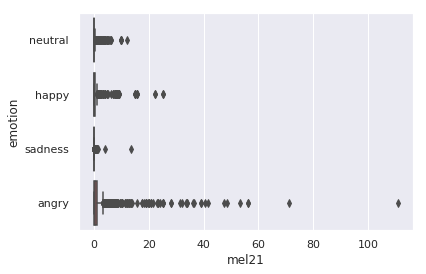

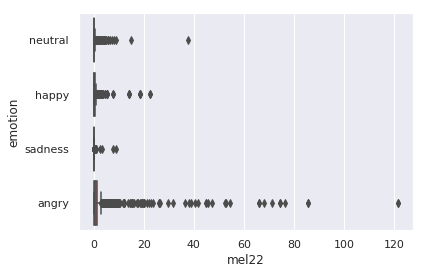

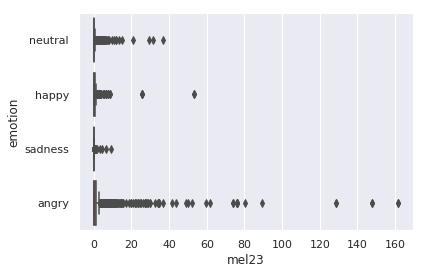

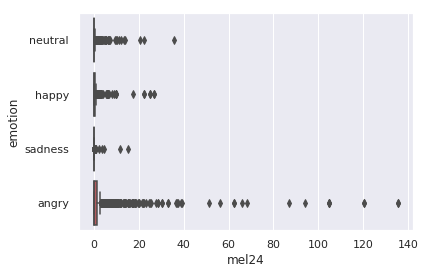

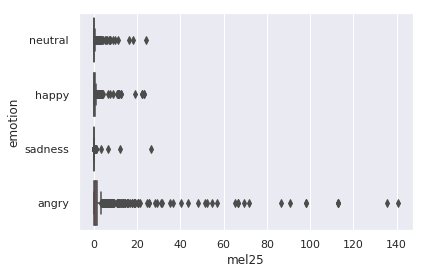

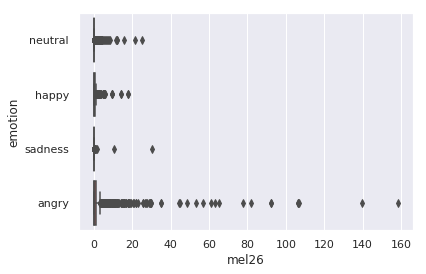

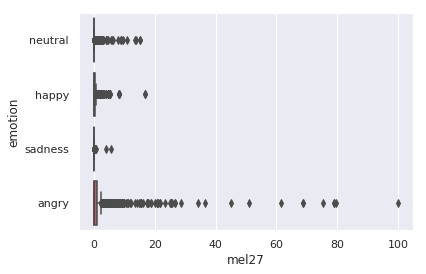

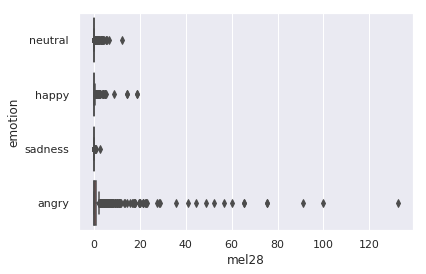

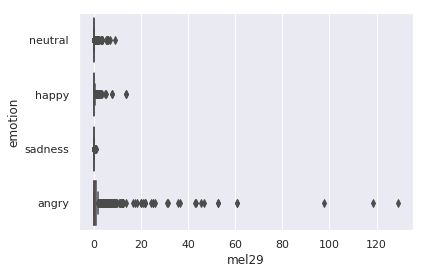

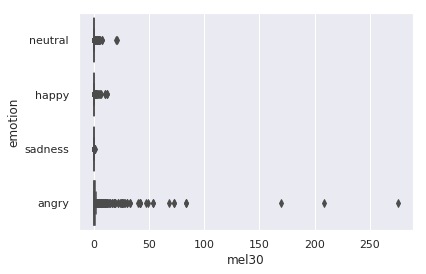

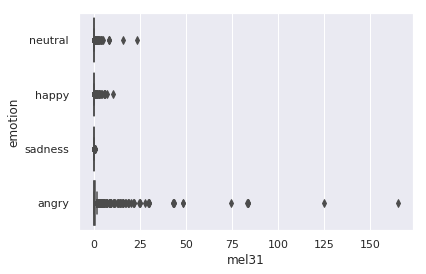

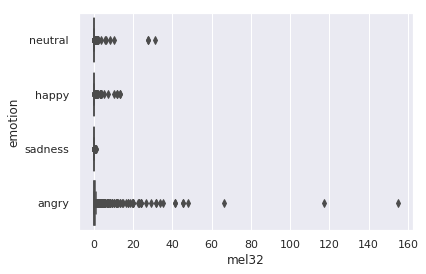

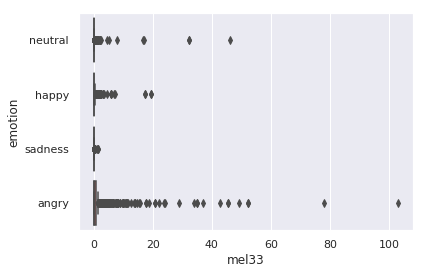

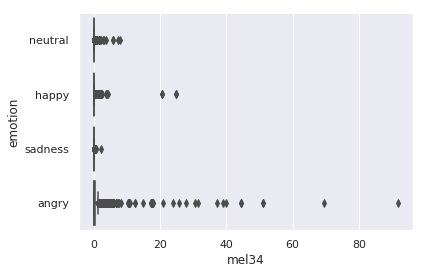

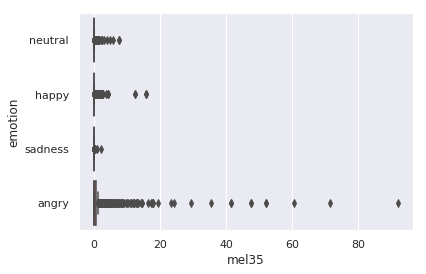

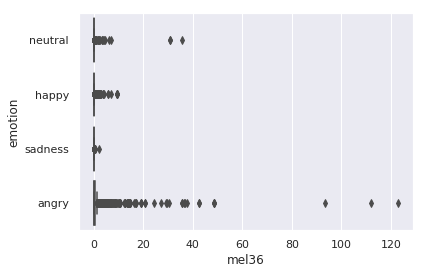

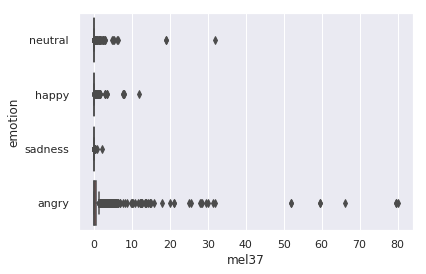

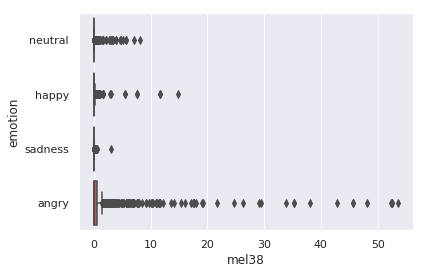

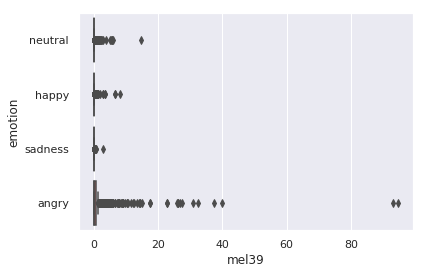

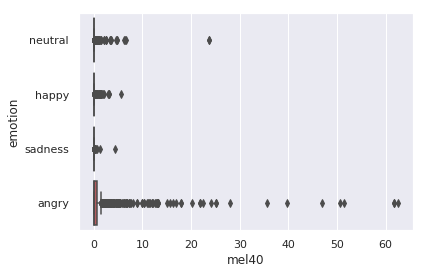

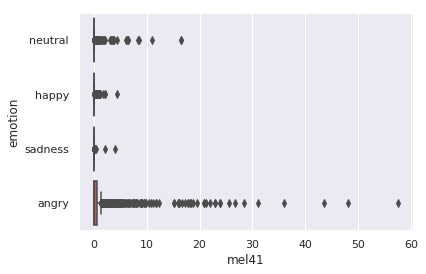

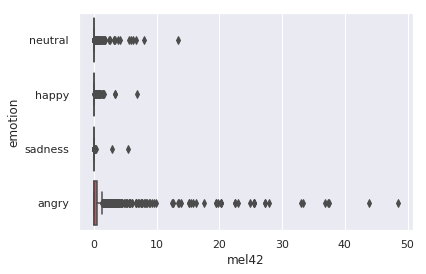

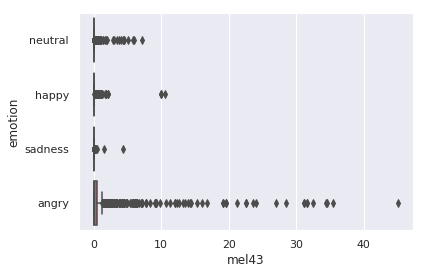

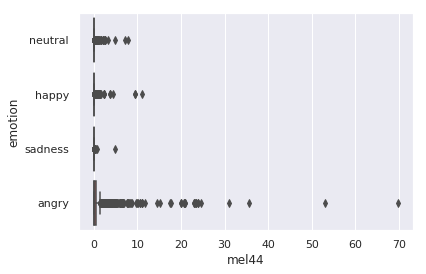

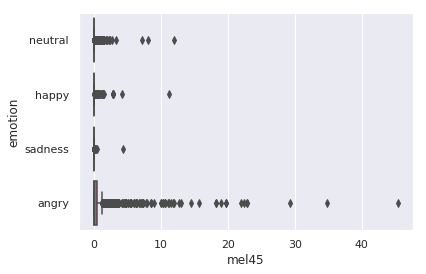

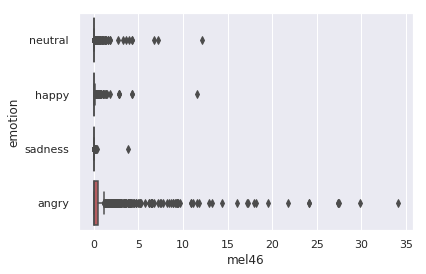

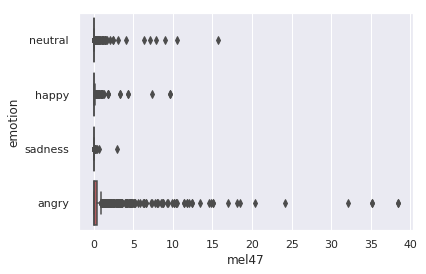

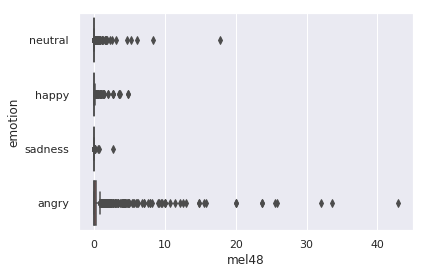

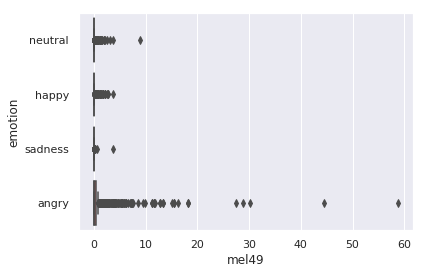

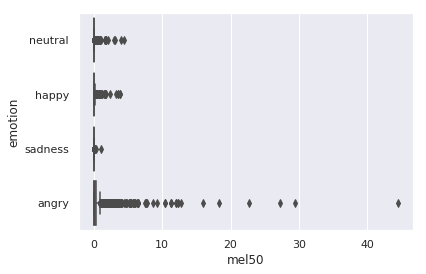

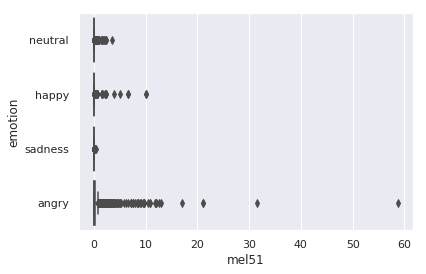

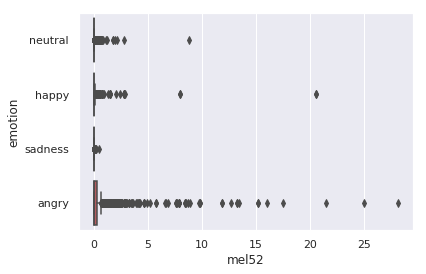

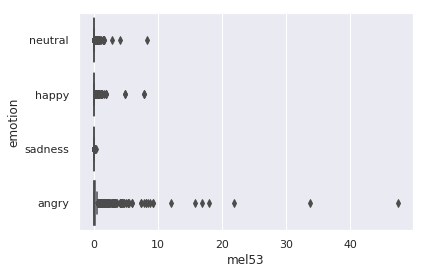

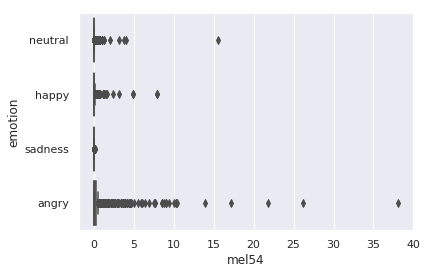

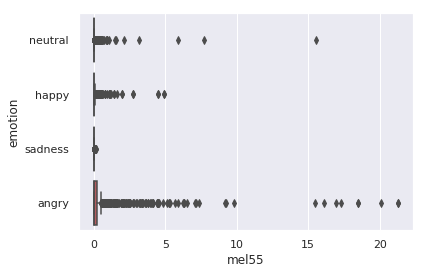

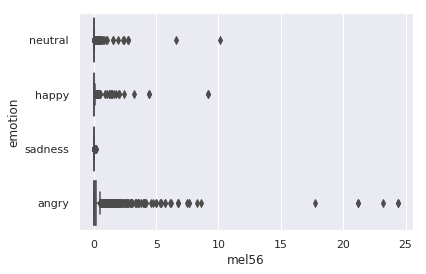

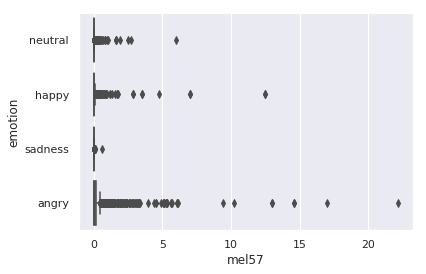

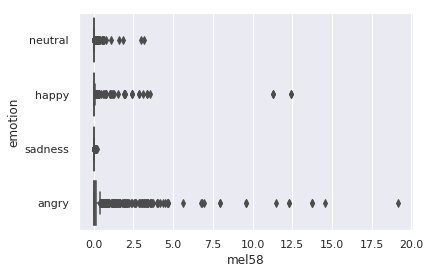

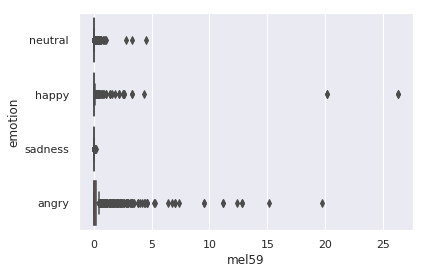

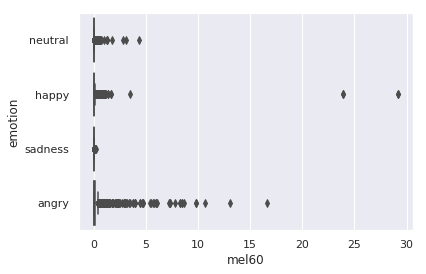

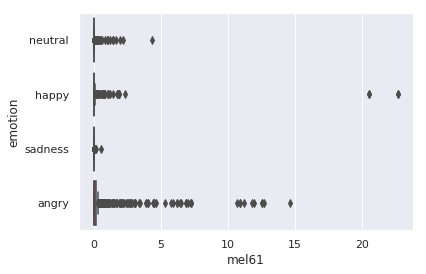

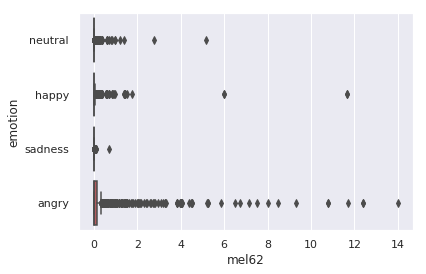

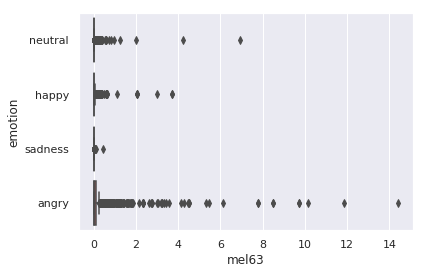

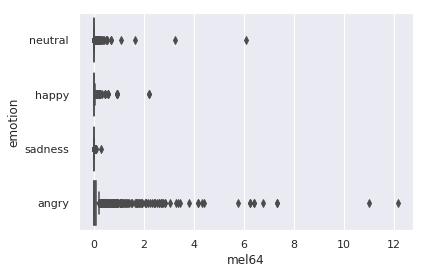

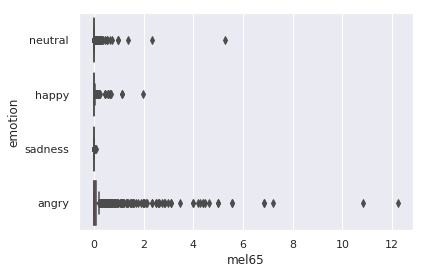

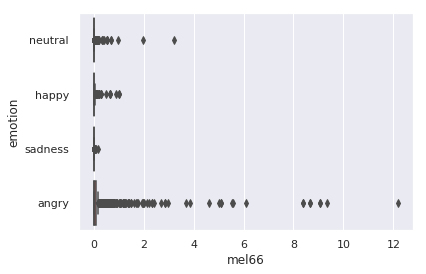

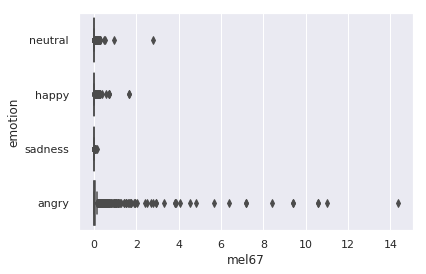

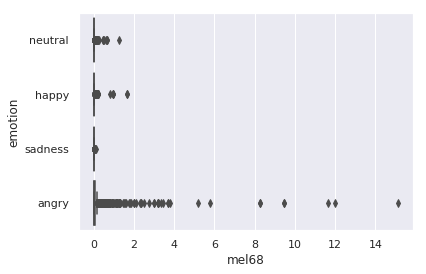

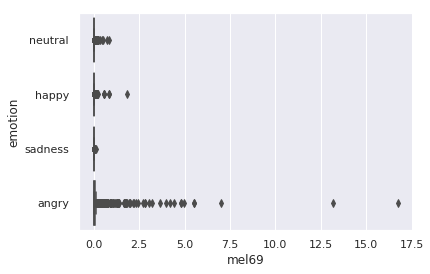

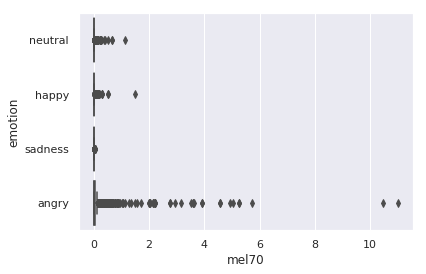

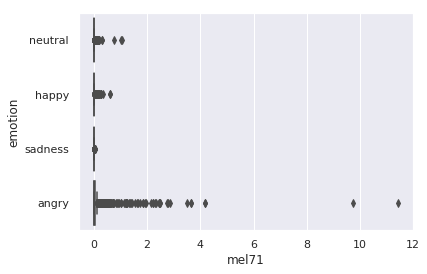

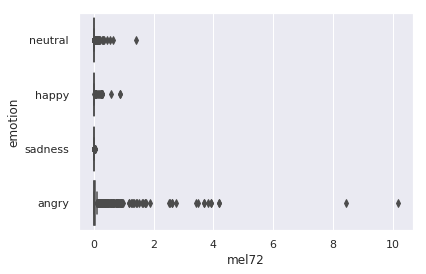

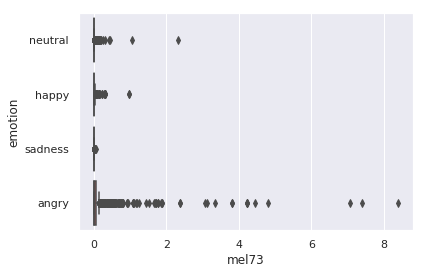

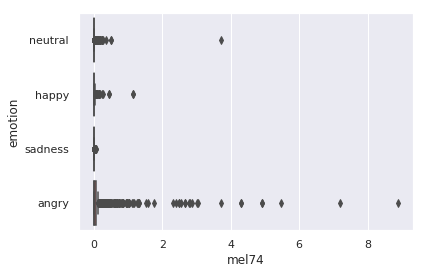

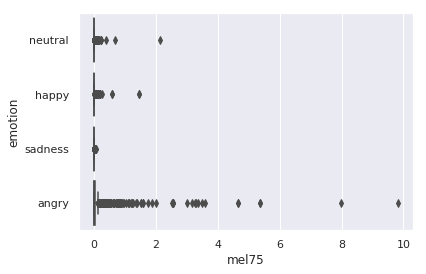

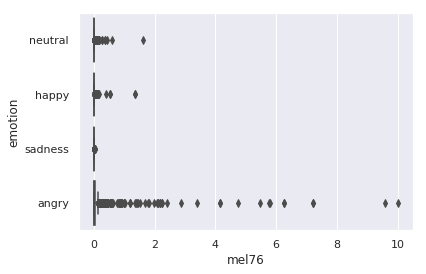

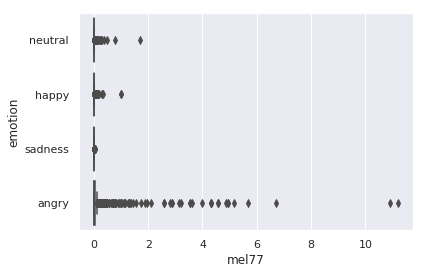

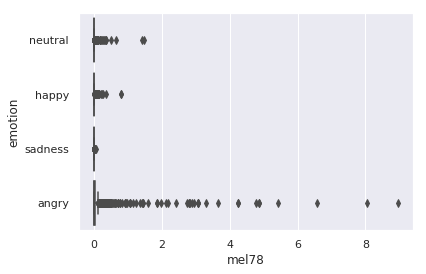

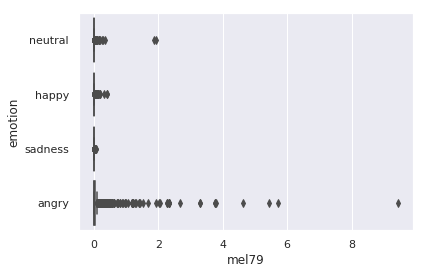

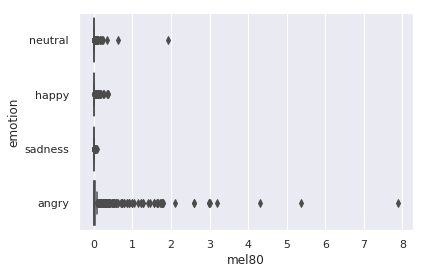

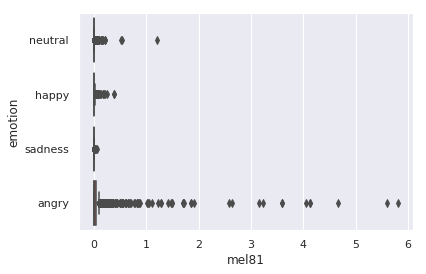

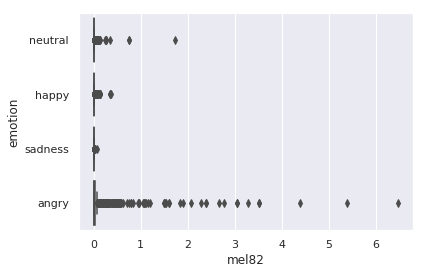

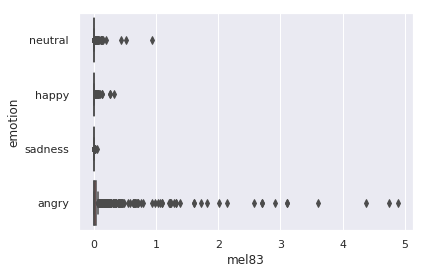

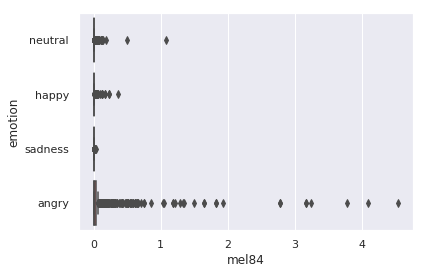

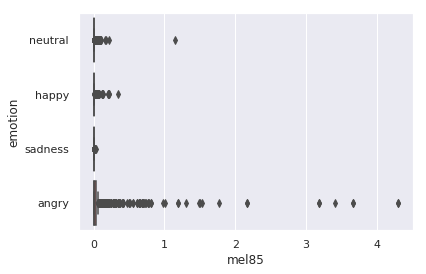

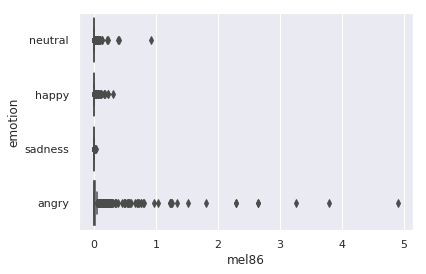

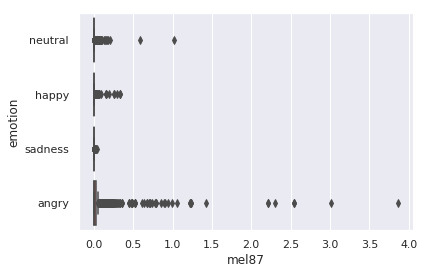

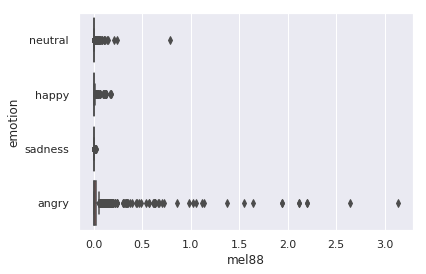

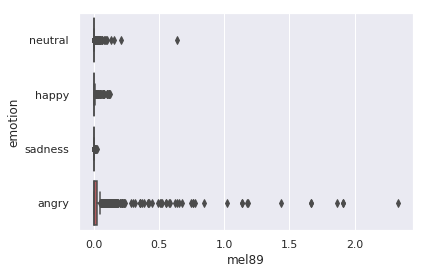

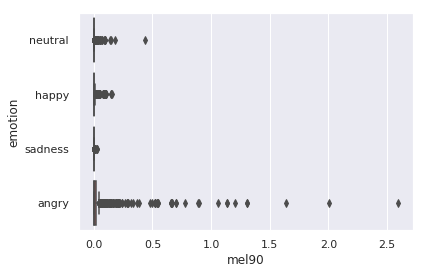

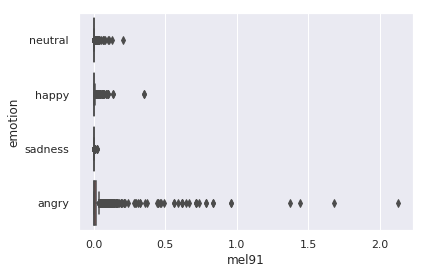

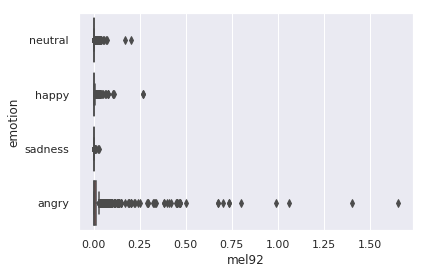

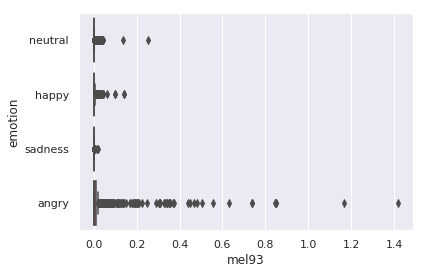

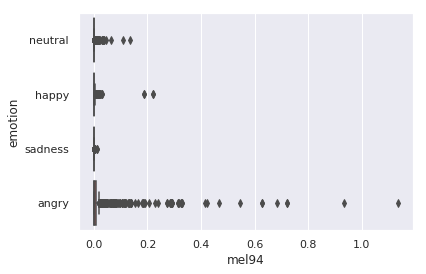

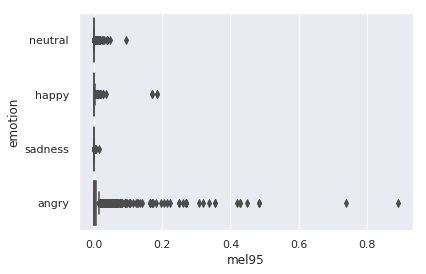

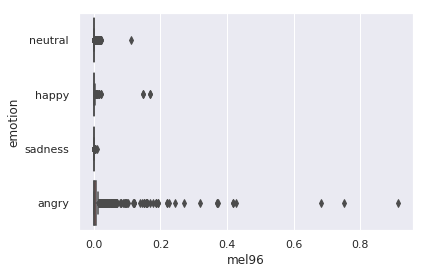

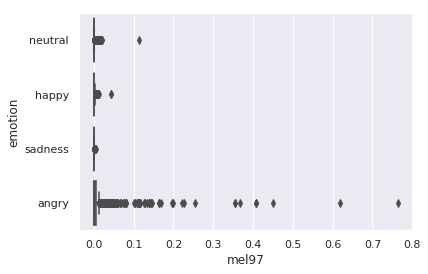

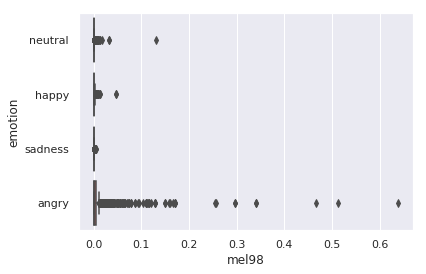

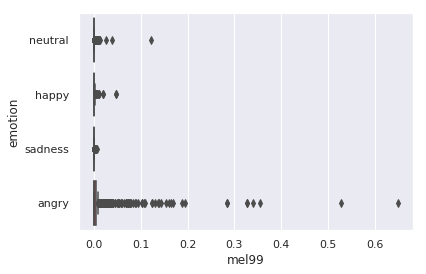

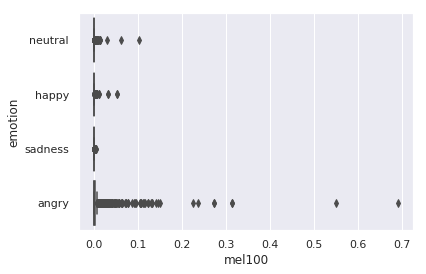

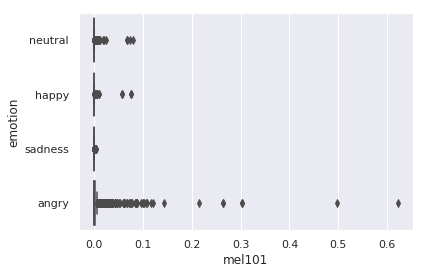

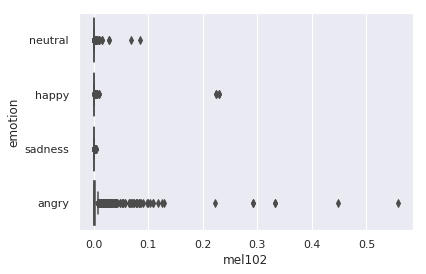

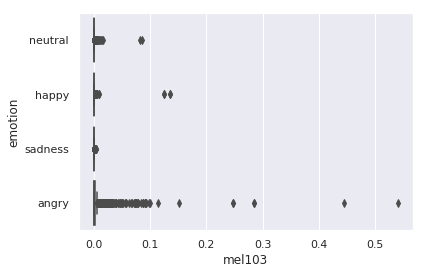

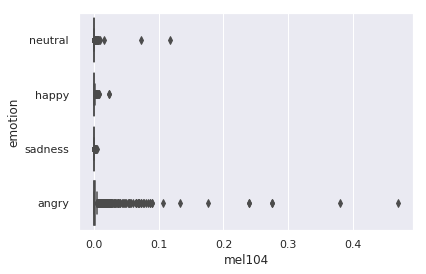

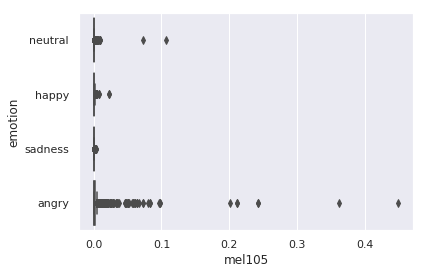

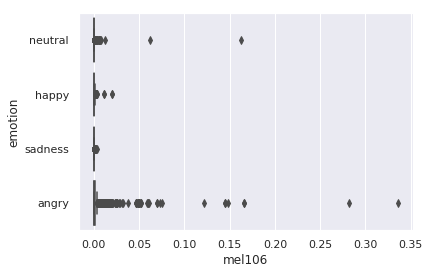

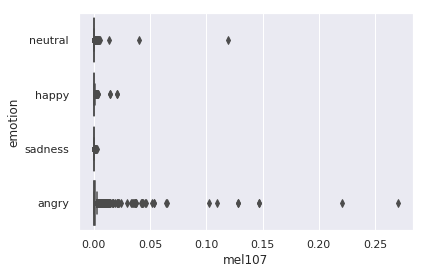

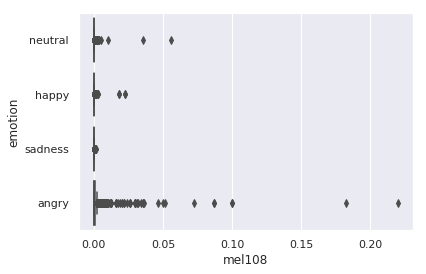

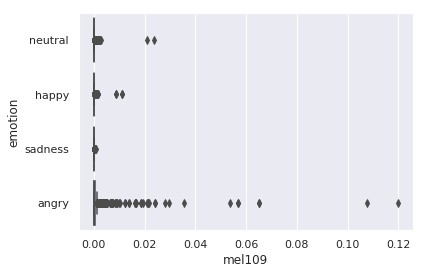

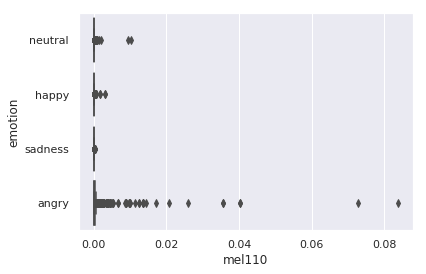

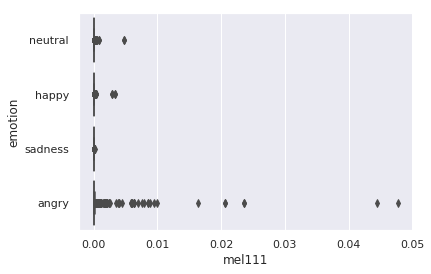

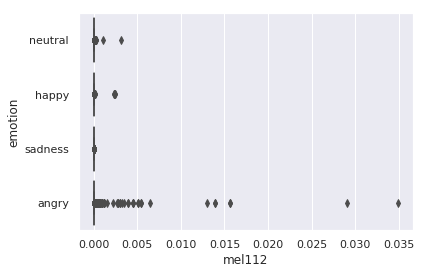

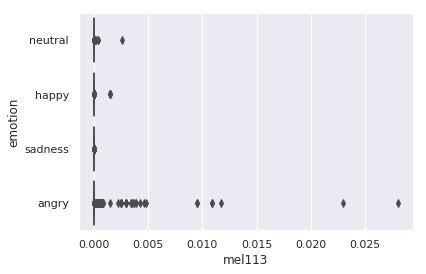

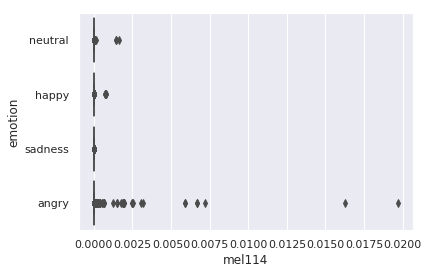

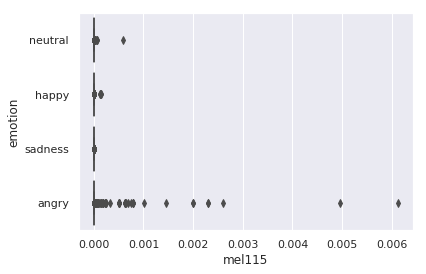

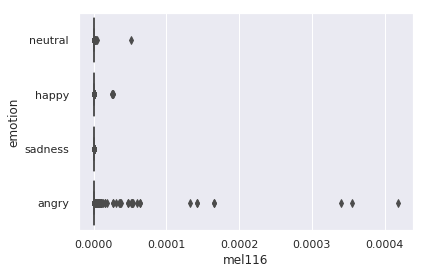

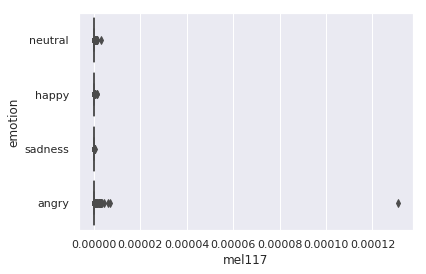

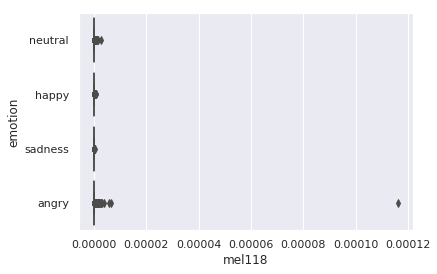

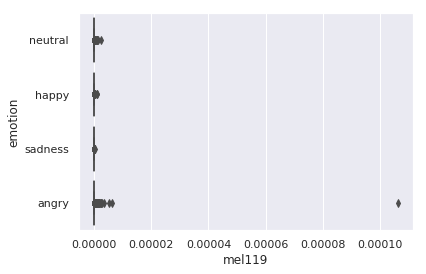

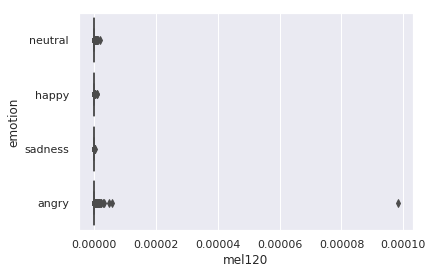

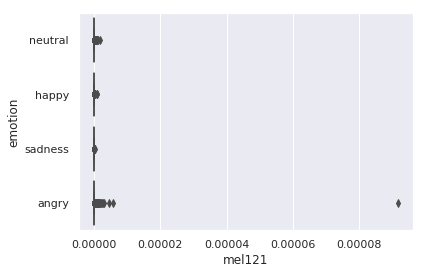

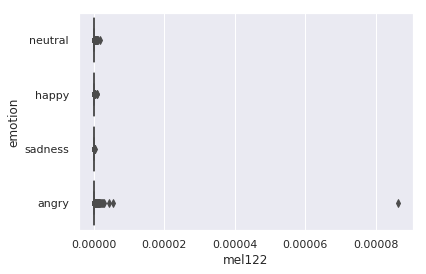

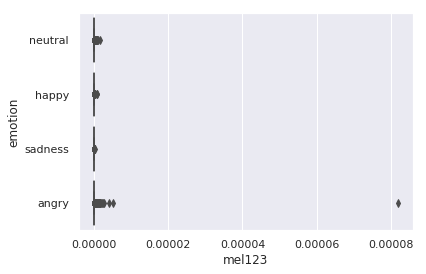

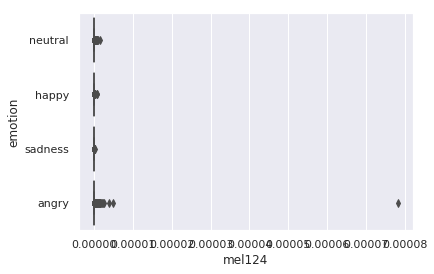

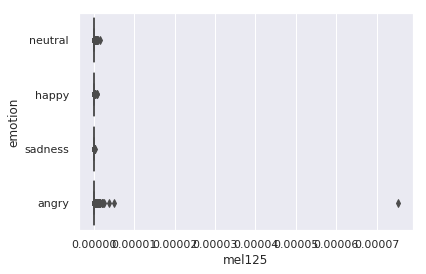

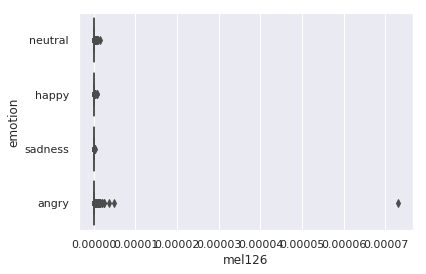

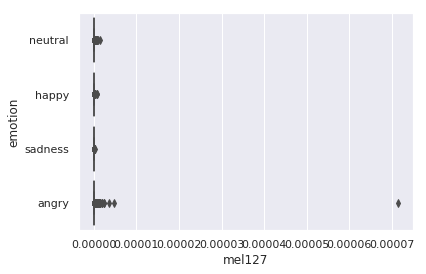

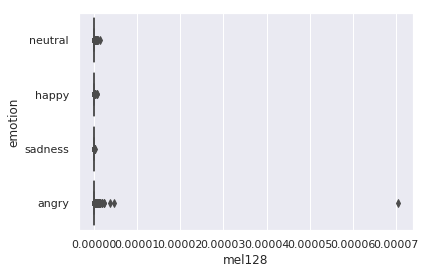

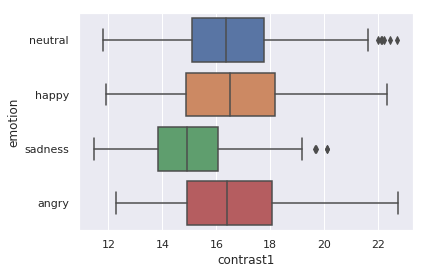

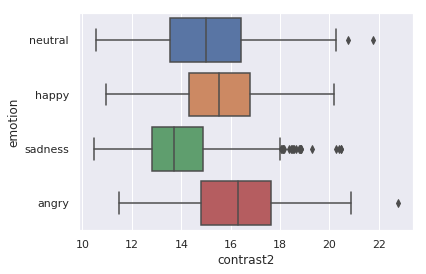

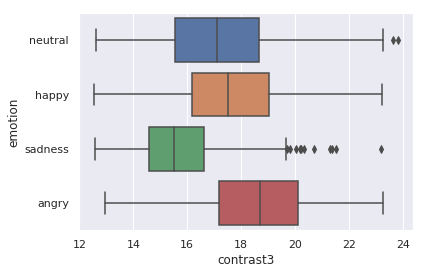

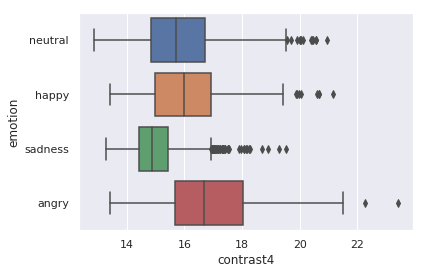

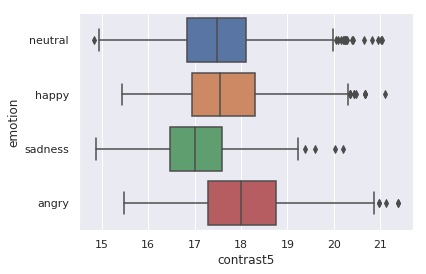

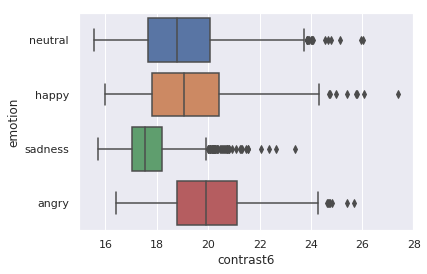

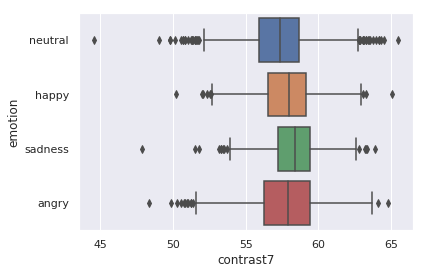

In [30]:
for col in columns:
    sns.boxplot(col, 'emotion', data=audio_4emotions)
    plt.show()